In [26]:
from AT_funs import *

In [27]:
filename = 'BC.MI.csv'
df = read_csv(filename)
ticker = filename.replace('csv', '')

filename_bm = 'FTSE_MIB.xlsx'
bm_df = read_xlsx(filename_bm)
bm_name = filename_bm.replace('xlsx', '')

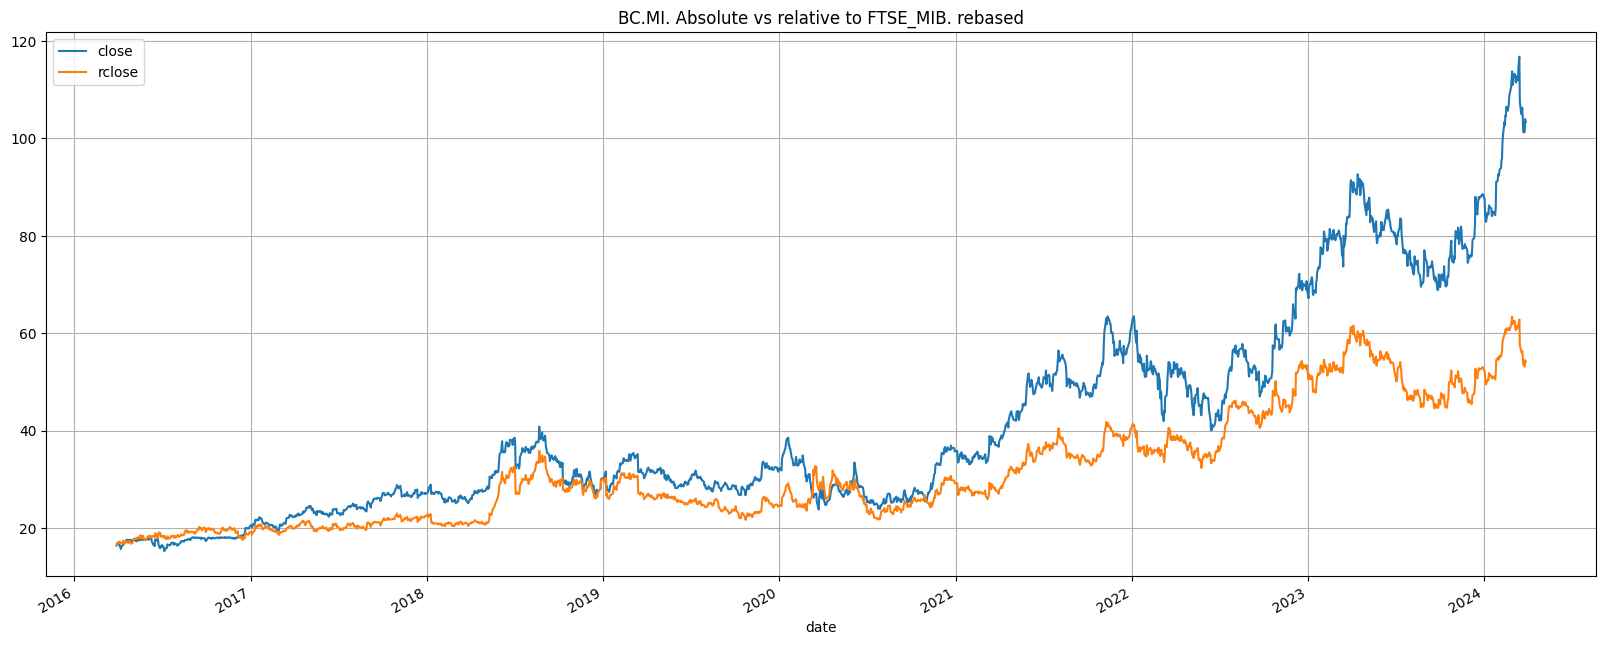

In [28]:
plot_abs_rel(df, ticker, bm_df, bm_name)

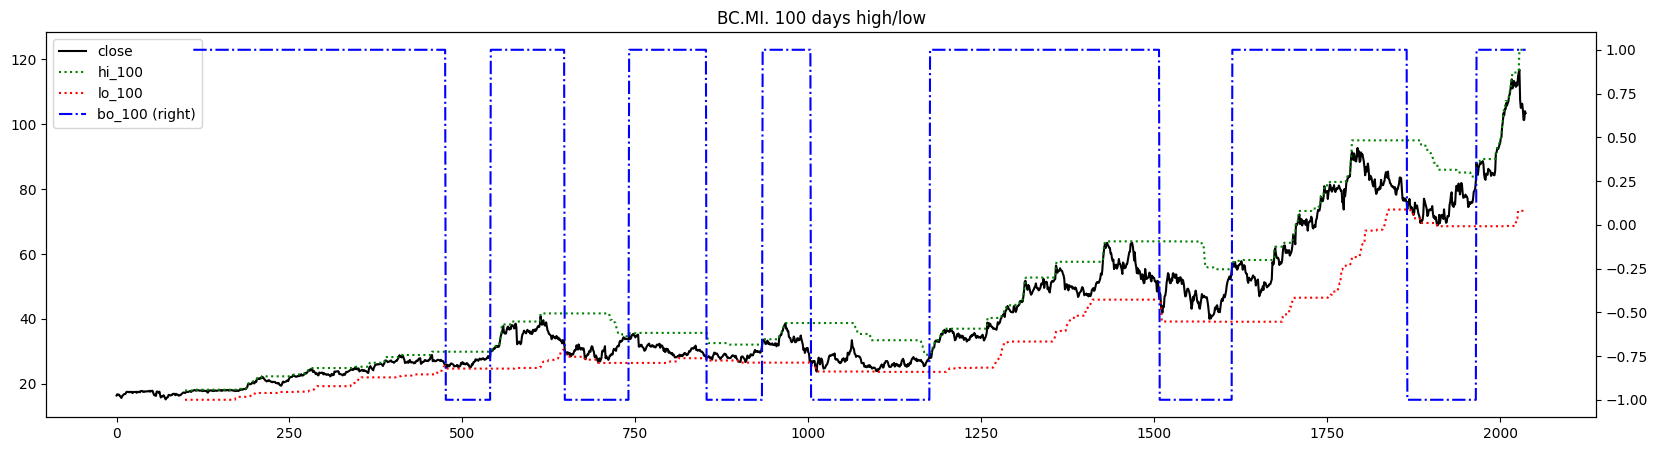

In [29]:
window_bo = 100
df_bo = df.copy()
df_bo = signal_bo(df_bo, window_bo)
bo_signal = 'bo_' + str(window_bo)
plot_signal_bo(df_bo, window_bo, ticker)

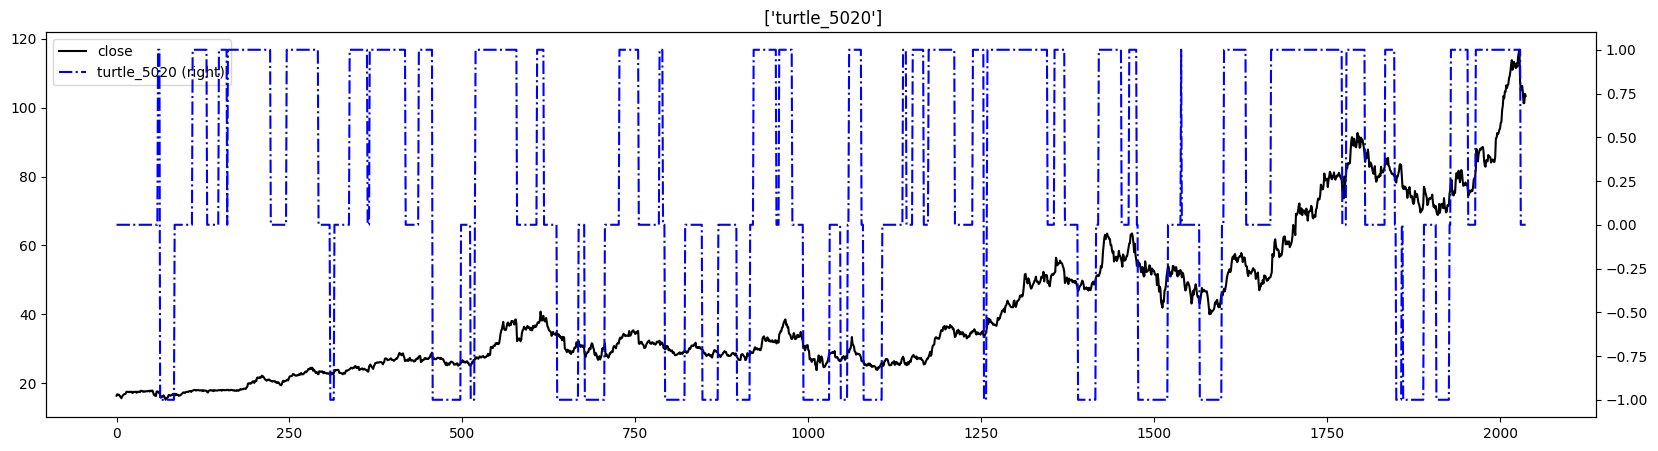

In [30]:
fast = 20
slow = 50
df_tt = df.copy()
df_tt = signal_tt(df_tt, fast = fast, slow = slow)
tt_signal = 'turtle_' + str(slow) + str(fast)
plot_signal_tt(df_tt, fast, slow)

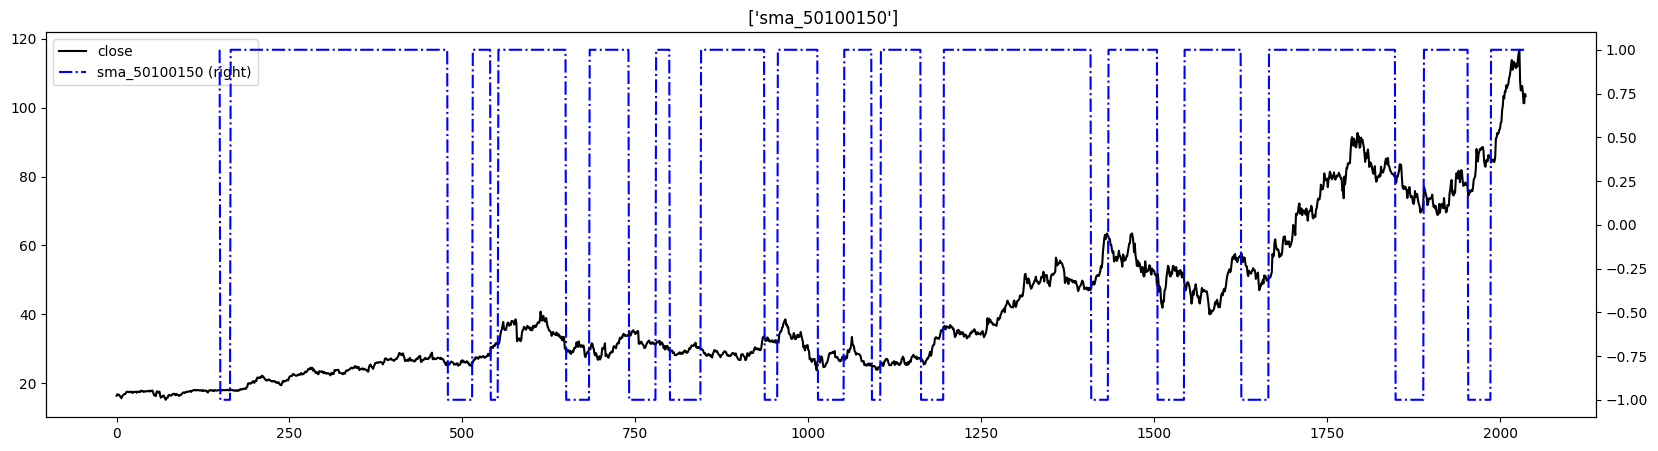

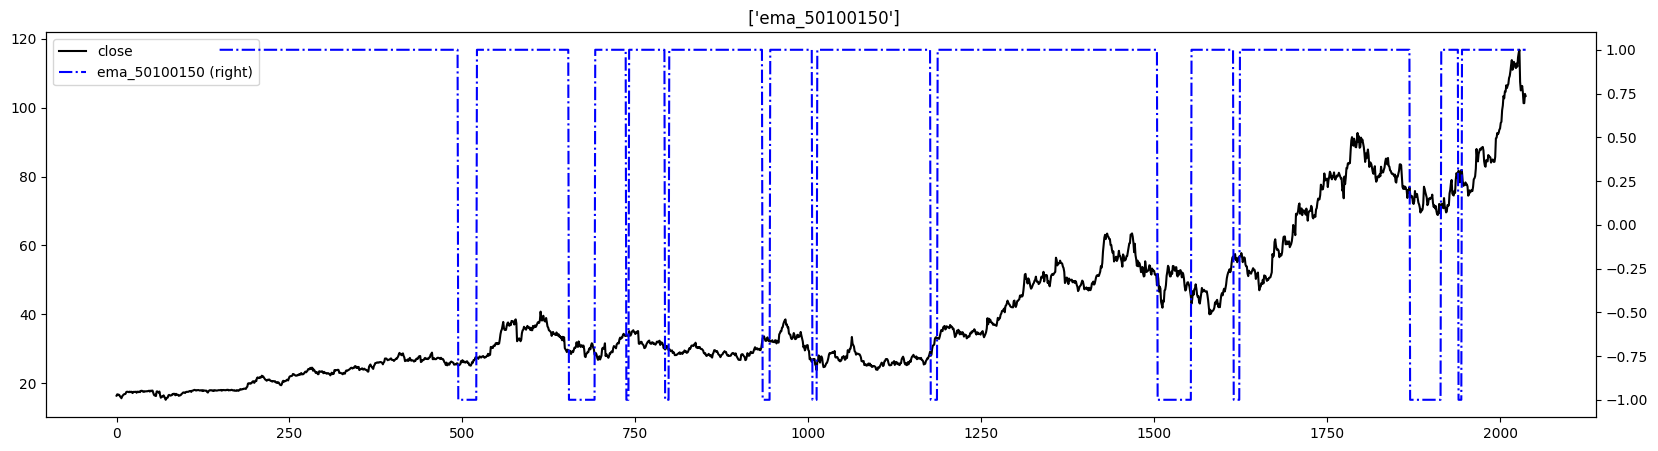

In [31]:
st = 50
mt = 100
lt = 150
df_ma = df.copy()
df_ma = signal_sma(df_ma, st, mt, lt)
df_ma = signal_ema(df_ma, st, mt, lt)

sma_signal = 'sma_' + str(st) + str(mt) + str(lt)
ema_signal = 'ema_' + str(st) + str(mt) + str(lt)

plot_signal_ma(df_ma, st, mt, lt)

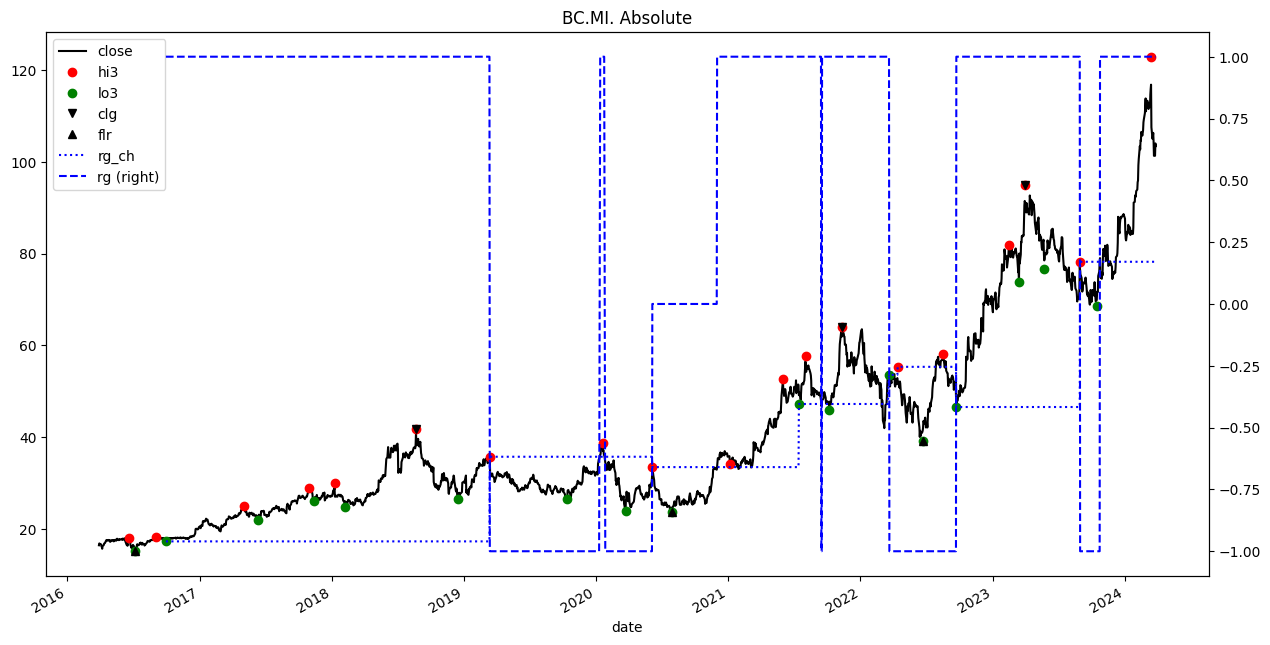

In [32]:
df_fc = df.copy()
df_fc = detect_regime(df_fc, bm_df)
fc_signal = 'rg'
fcr_signal = 'rrg'
plot_signal_abs(df_fc, ticker)

1
1


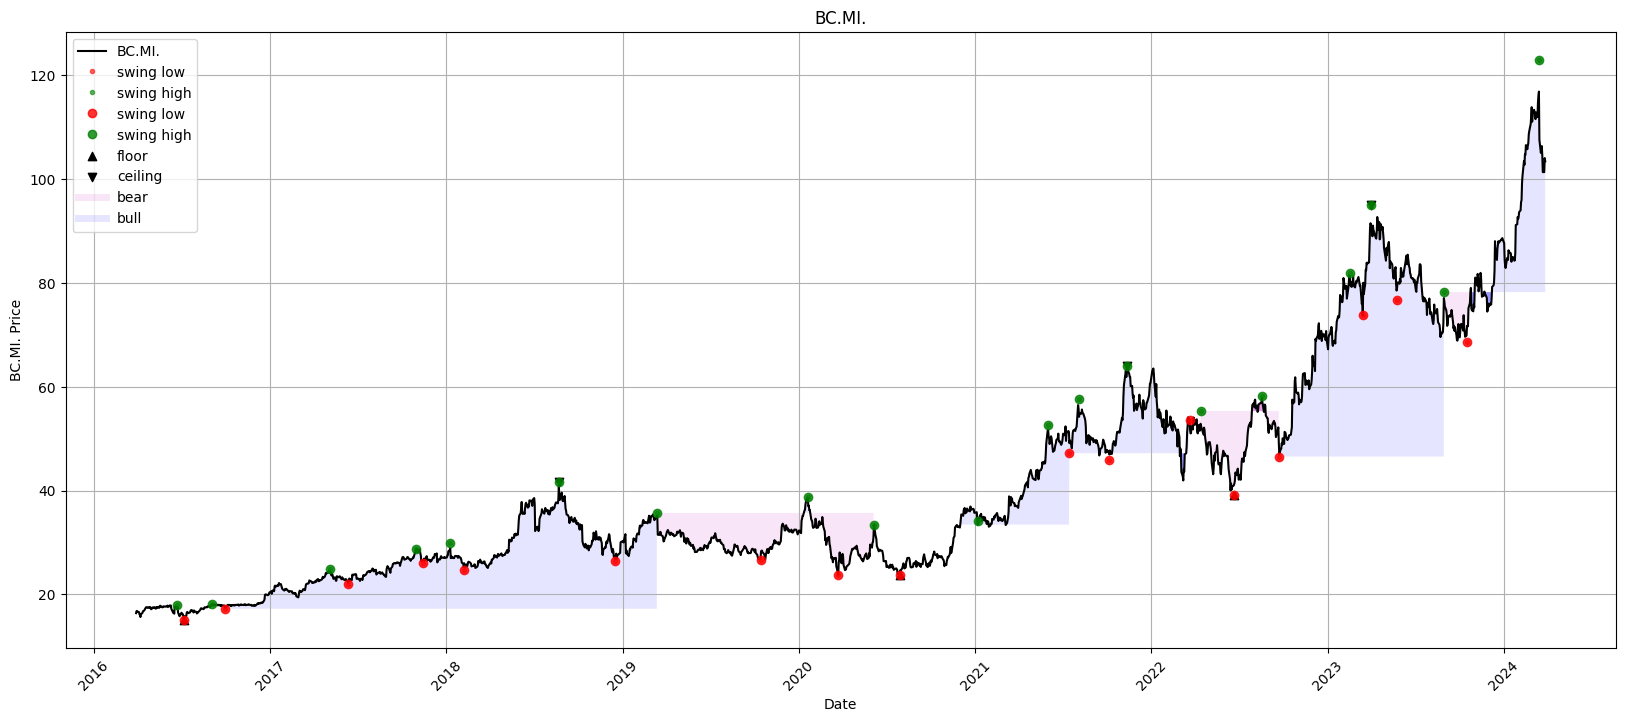

In [33]:
plot_regime_abs(df_fc, ticker)

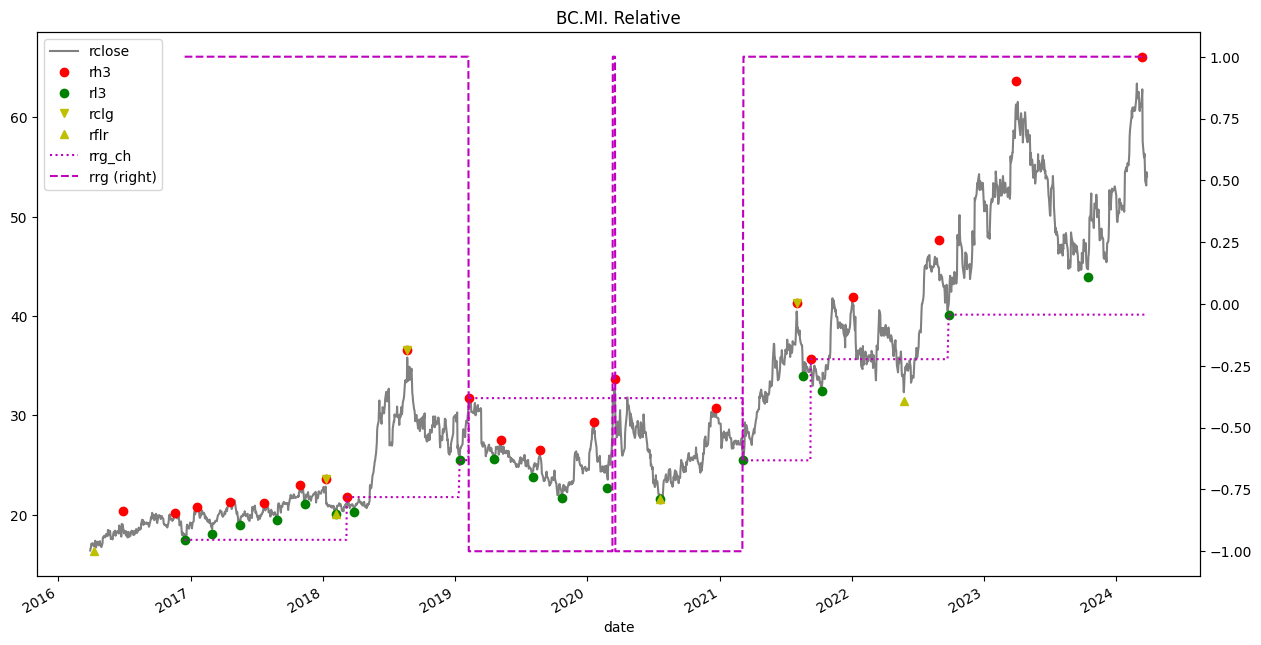

In [34]:
plot_signal_rel(df_fc, ticker)

1
1


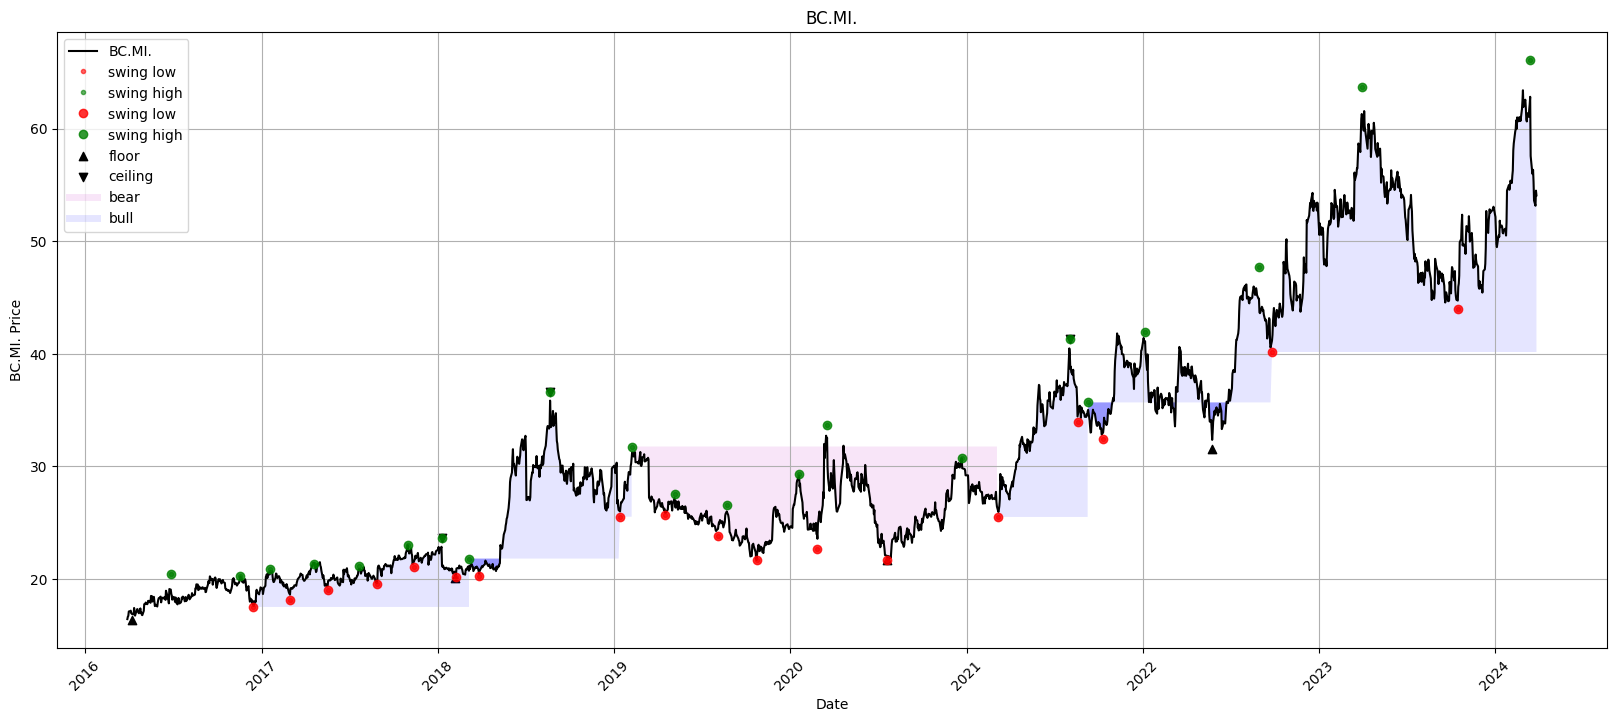

In [35]:
plot_regime_rel(df_fc, ticker)

In [36]:
method = ['breakout', 'turtle', 'sma', 'ema', 'floor_ceiling', 'floor_ceiling_relative']
signal = [bo_signal, tt_signal, sma_signal, ema_signal, fc_signal, fcr_signal]
df_signal = [df_bo, df_tt, df_ma, df_ma, df_fc, df_fc]

# method = ['turtle']
# signal = [tt_signal]
# df_signal = [df_tt]

In [37]:
def get_df_signal(df_signal, signal, window_exp):
    df_signal = df_signal.copy()
    df_signal = get_returns(df_signal, signal)
    df_signal = get_expectancies(df_signal, window_exp)
    return df_signal
    

In [38]:
window_exp = 100  # set the value of window_exp  
output_signals = []  # create an empty list to hold the output dataframes  
  
for i in range(len(signal)):  
    df = df_signal[i]  # get the ith dataframe from df_signal  
    s = signal[i]  # get the ith signal from signal  
    m = method[i]
    output_df = get_df_signal(df, s, window_exp)  # call the function on the ith dataframe and signal  
    output_df['method'] = str(m)  # create a new column in output_df with the signal name  
    output_signals.append(output_df)  # append the output dataframe to the list  
  
# output_signals now contains the processed dataframes with the signal column added  


In [39]:
output_df_sel = pd.concat(output_signals, axis=0)  
output_df_sel = output_df_sel[['method', 'close', 'stop_loss','tt_cumul']]
output_df_sel.groupby('method').last() 

close  stop_loss  tt_cumul
method                                                 
breakout                103.400002      100.0 -0.103530
ema                     103.400002      100.0  4.859168
floor_ceiling           103.400000      100.0  5.459549
floor_ceiling_relative  103.400000      100.0  4.128039
sma                     103.400002      100.0  1.272188
turtle                  103.400002      104.5  0.460988

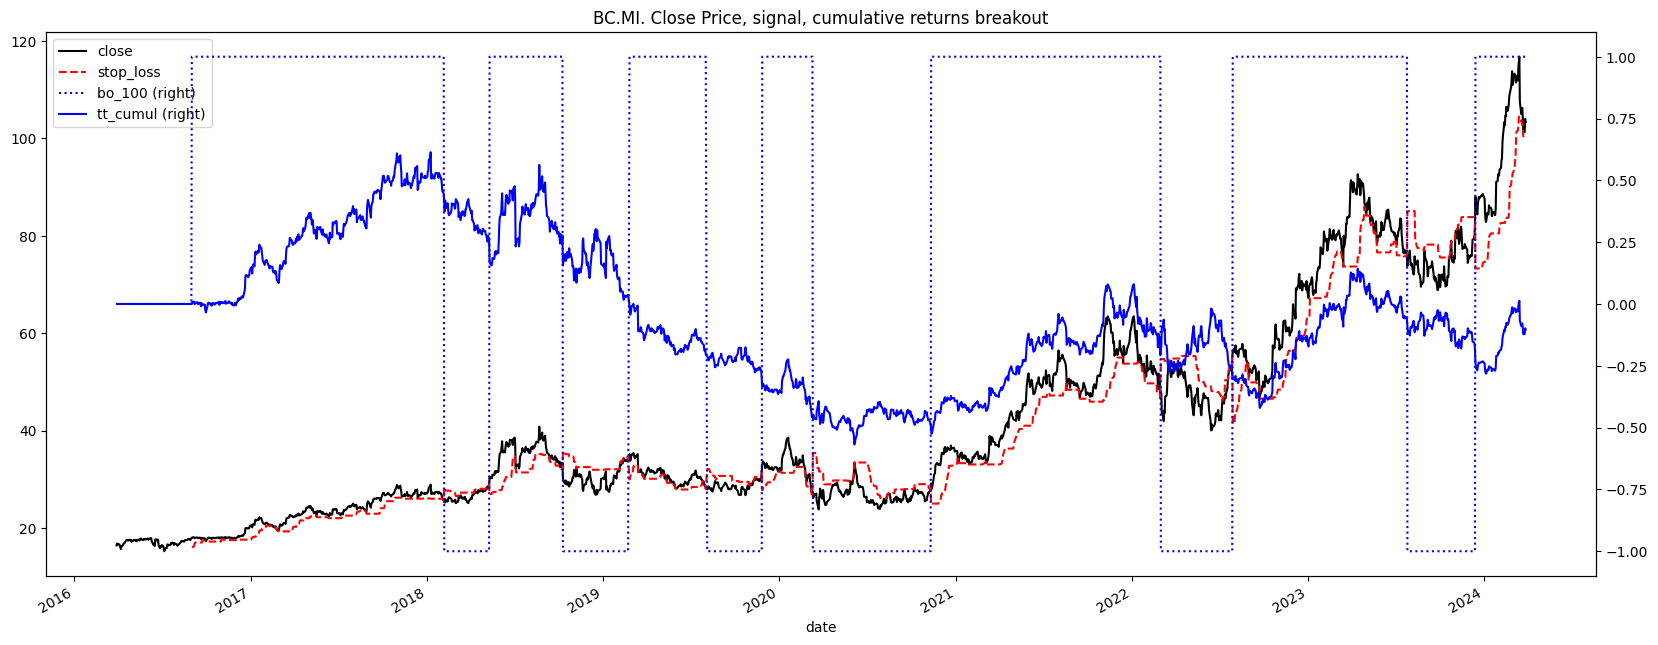

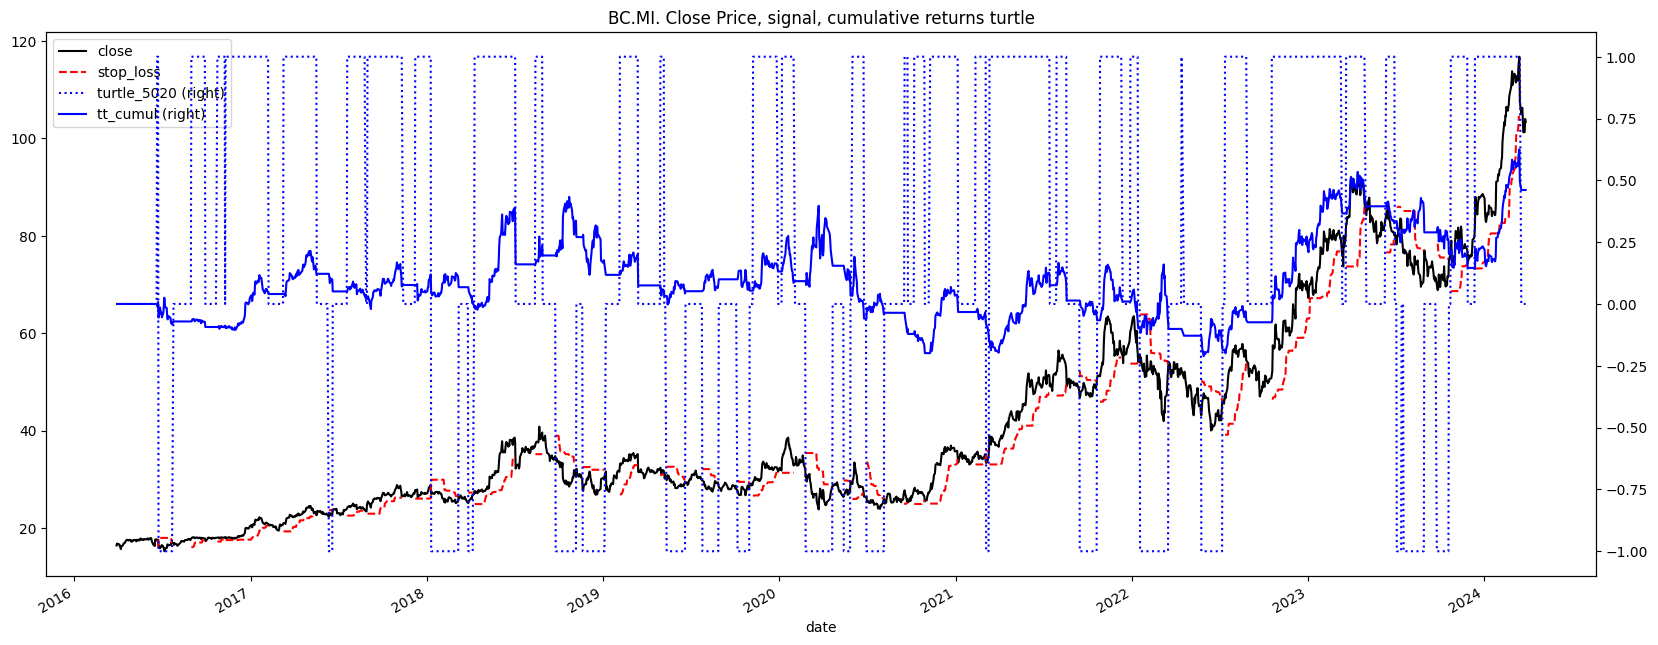

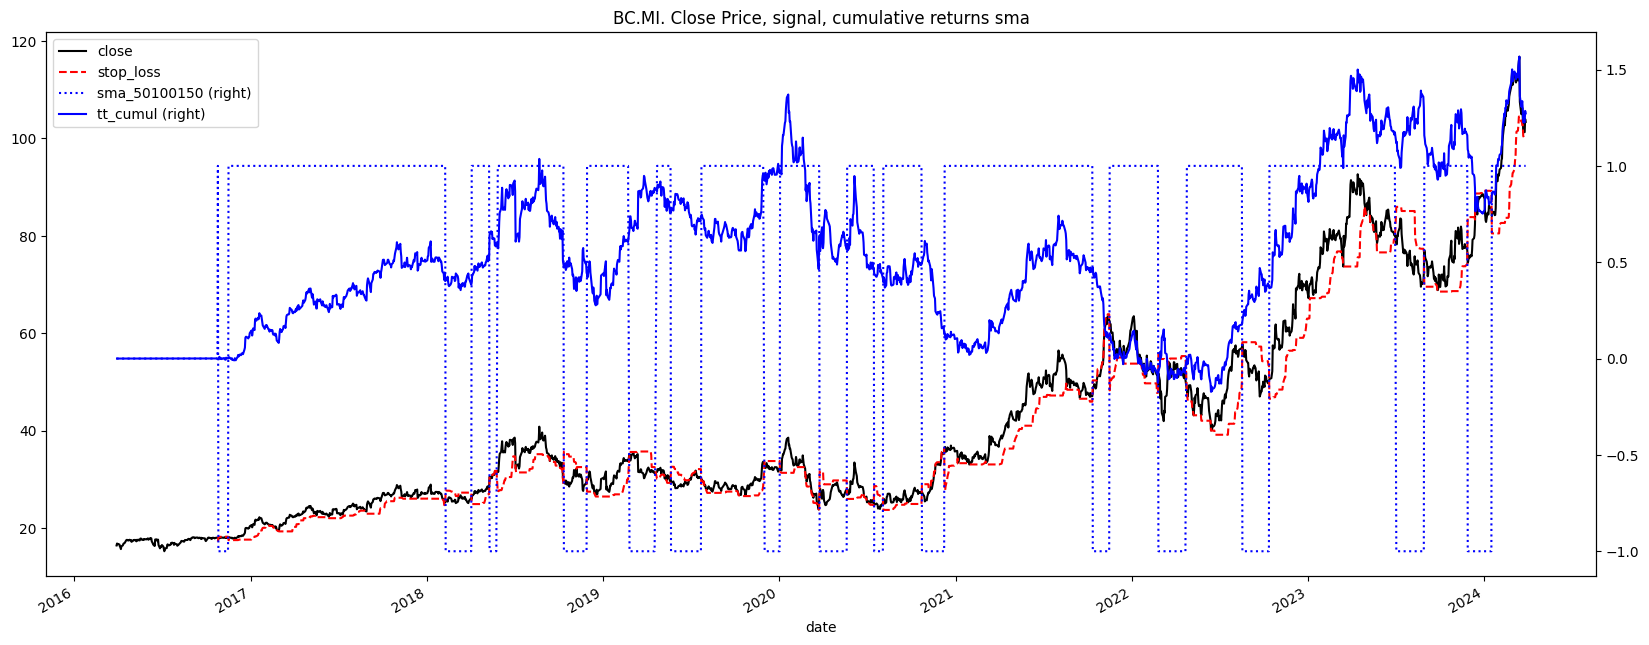

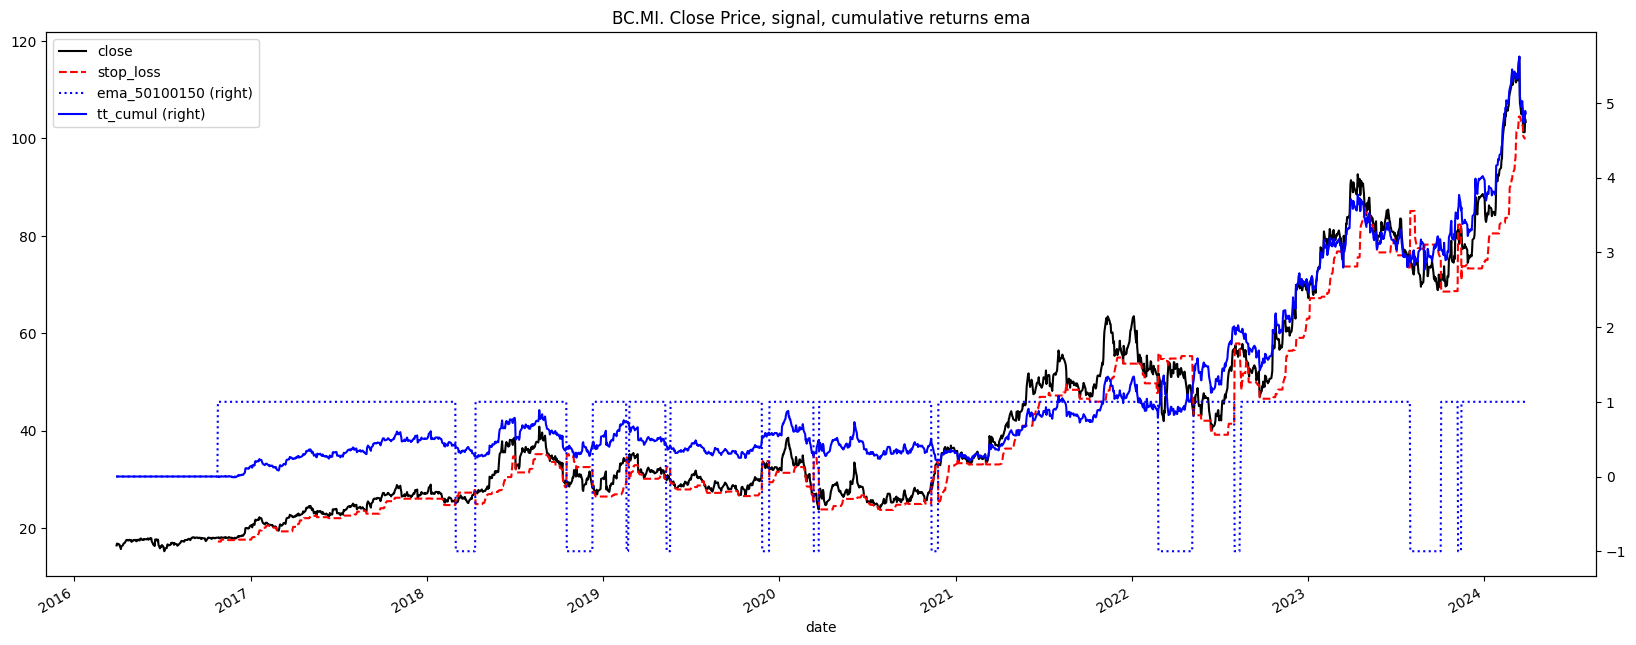

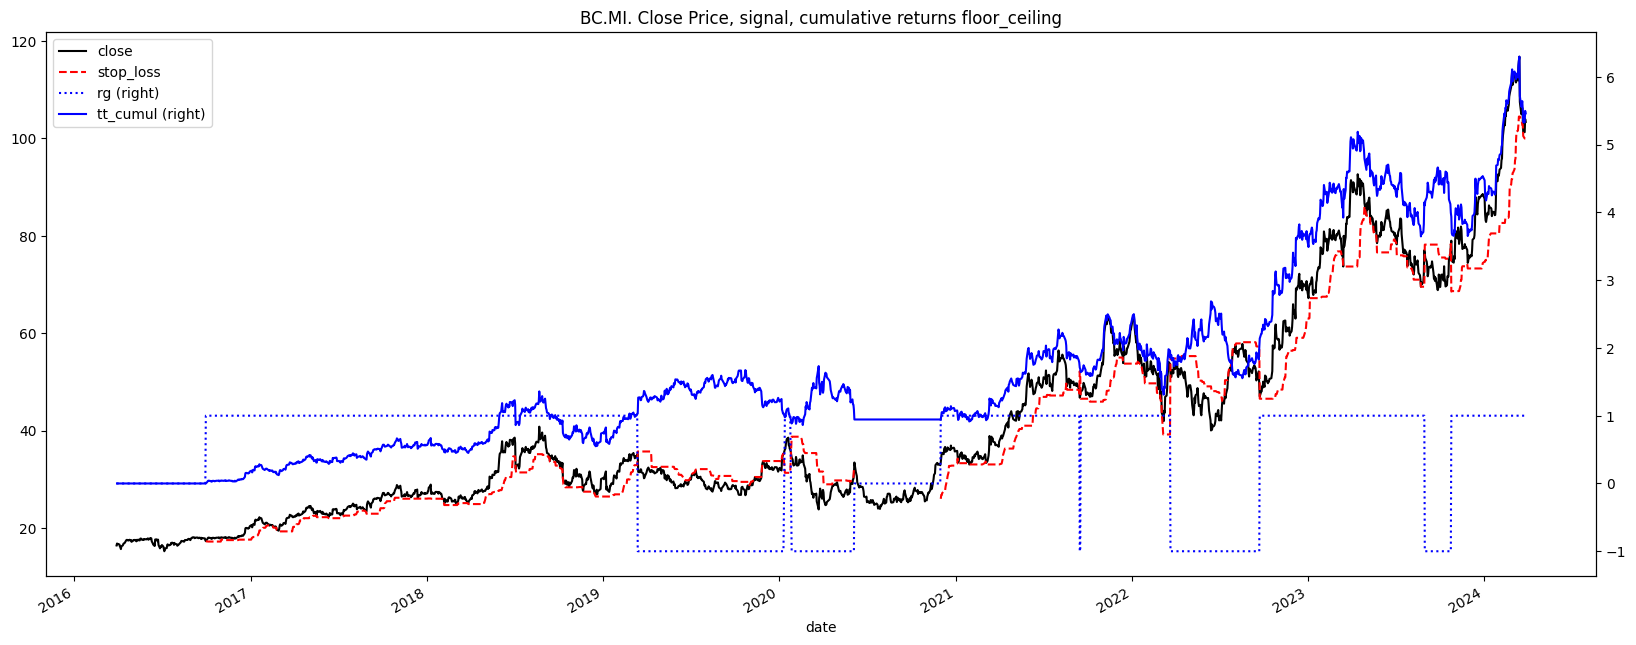

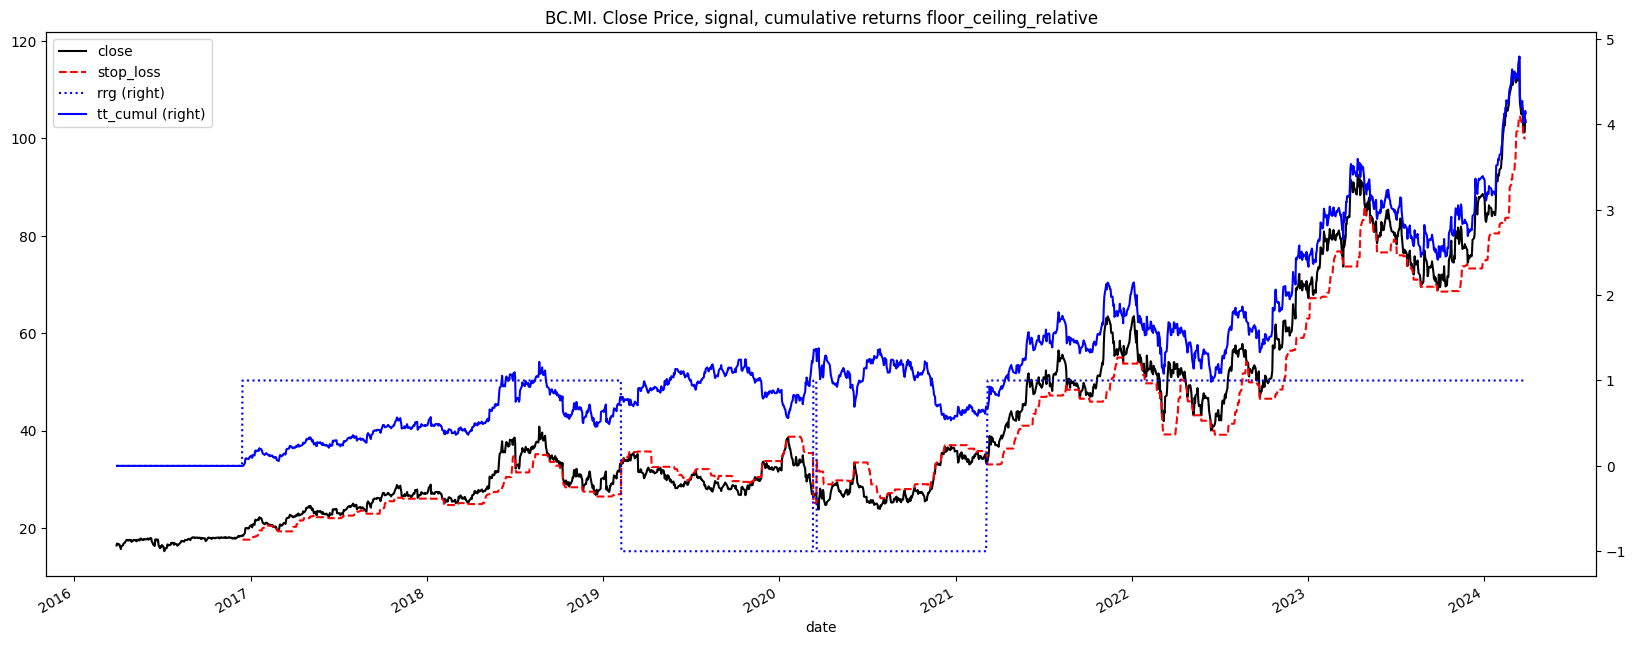

In [40]:
for i in range(len(signal)):  
    # print(i)
    df = output_signals[i]  # get the ith dataframe from df_signal  
    s = signal[i]  # get the ith signal from signal  
    m = method[i]
    plot_price_signal_cumreturns(df, ticker, s, m)

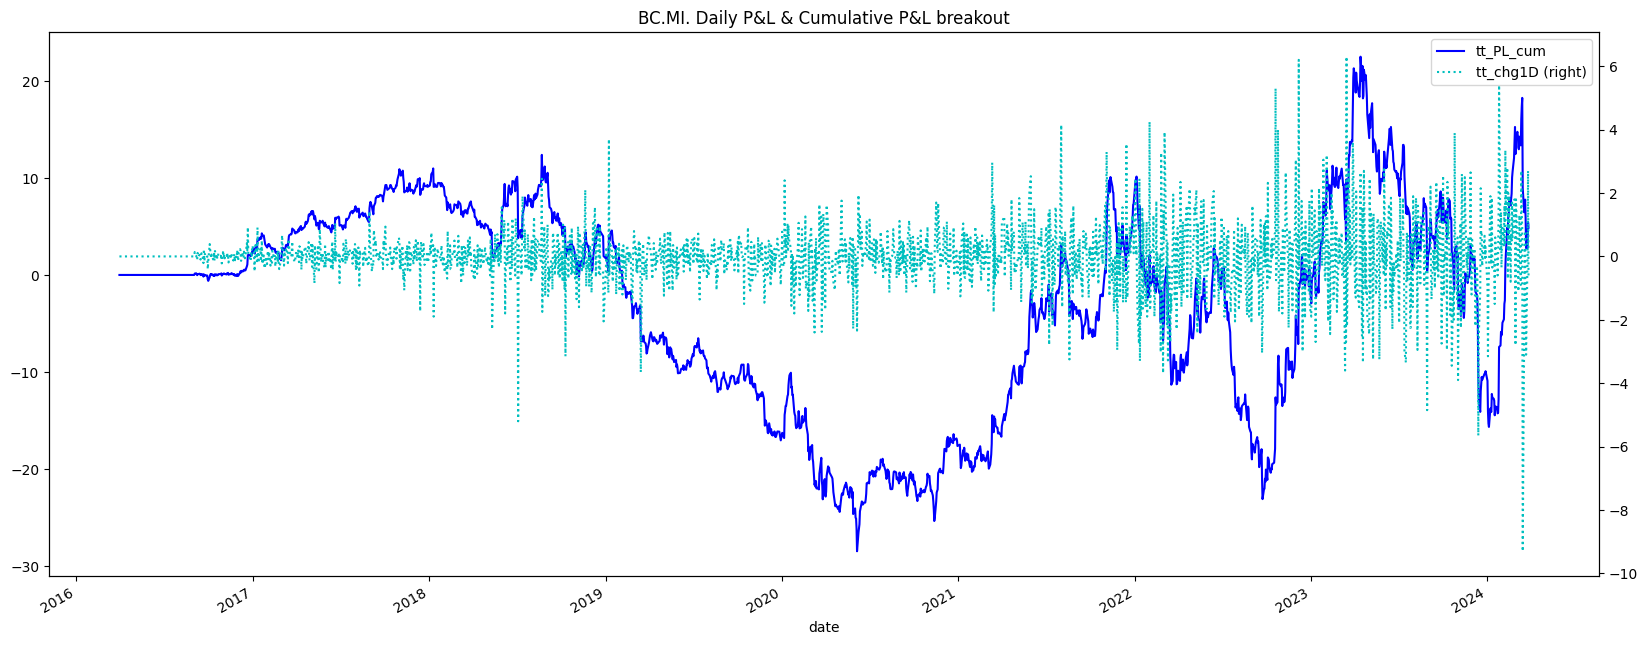

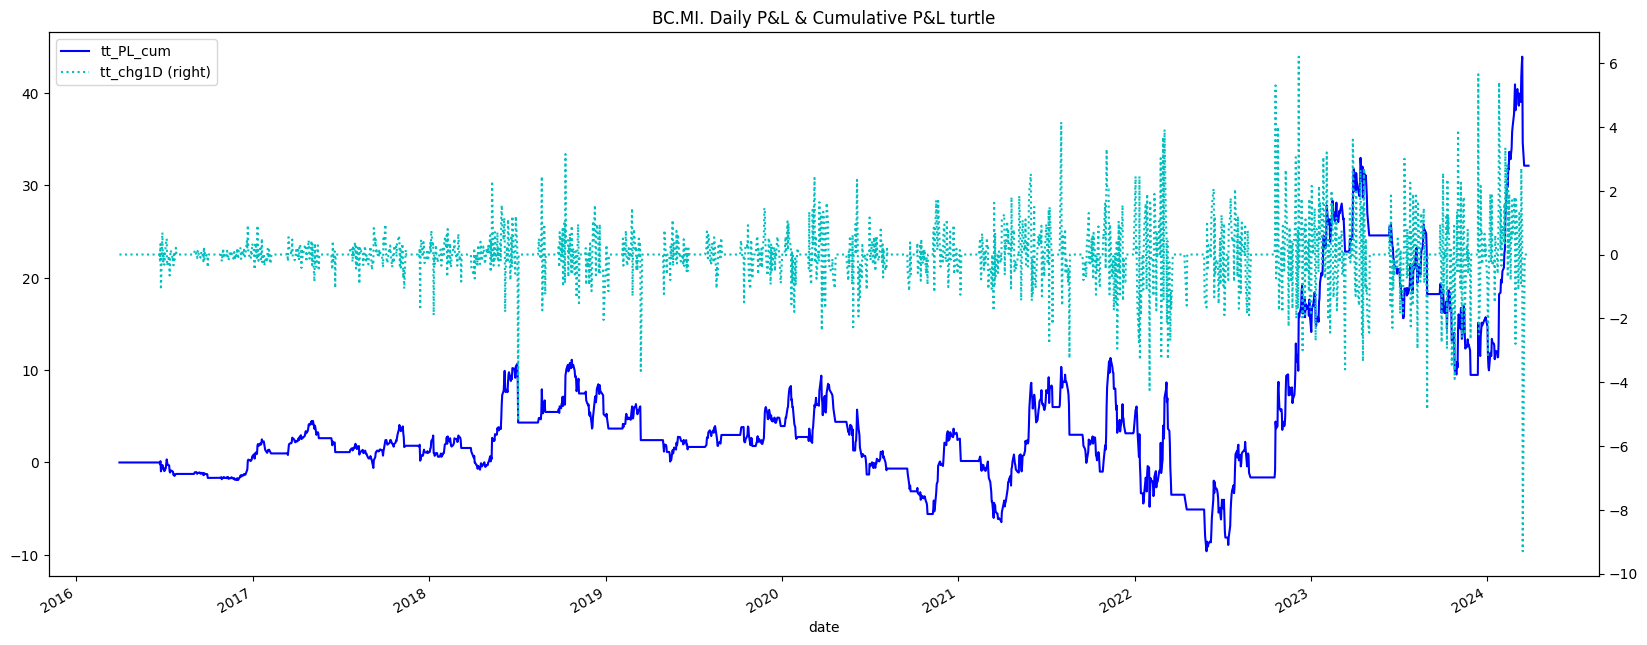

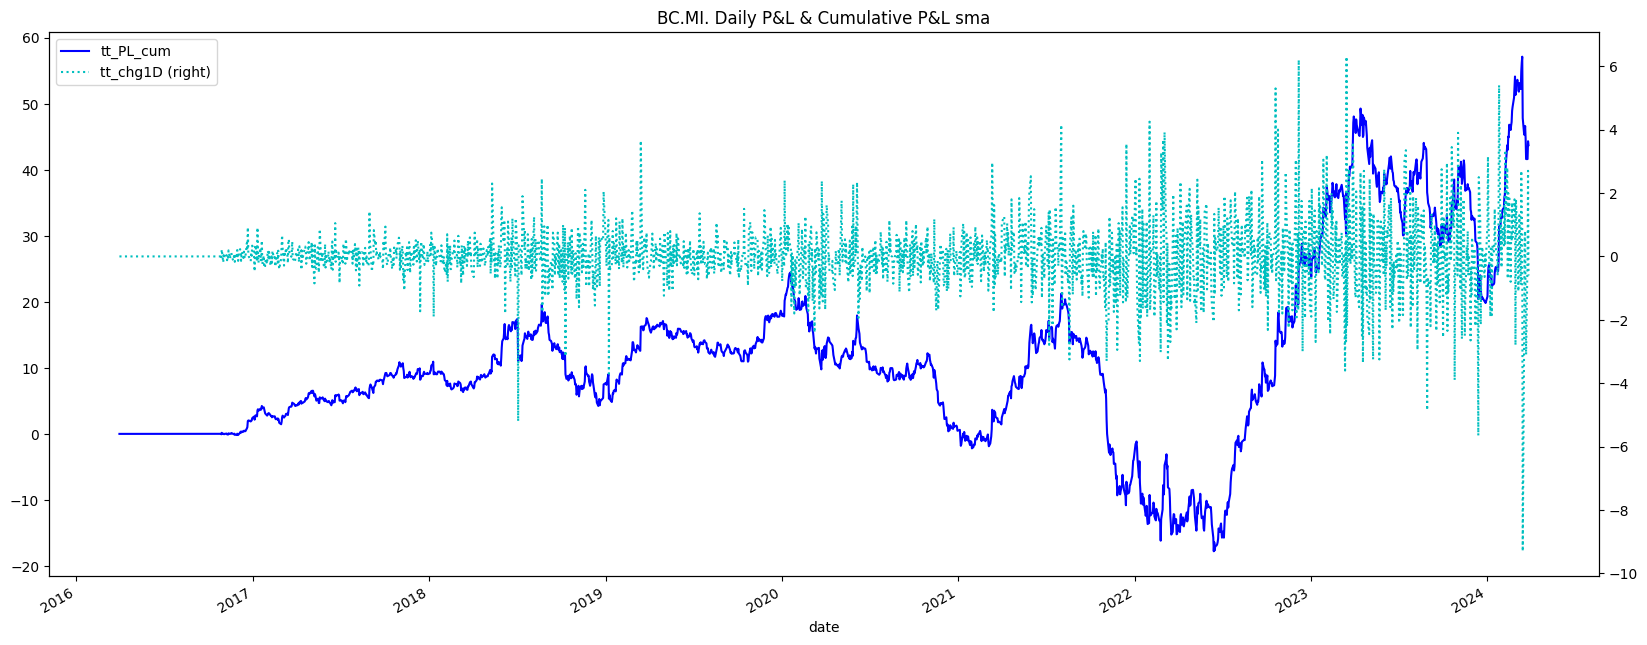

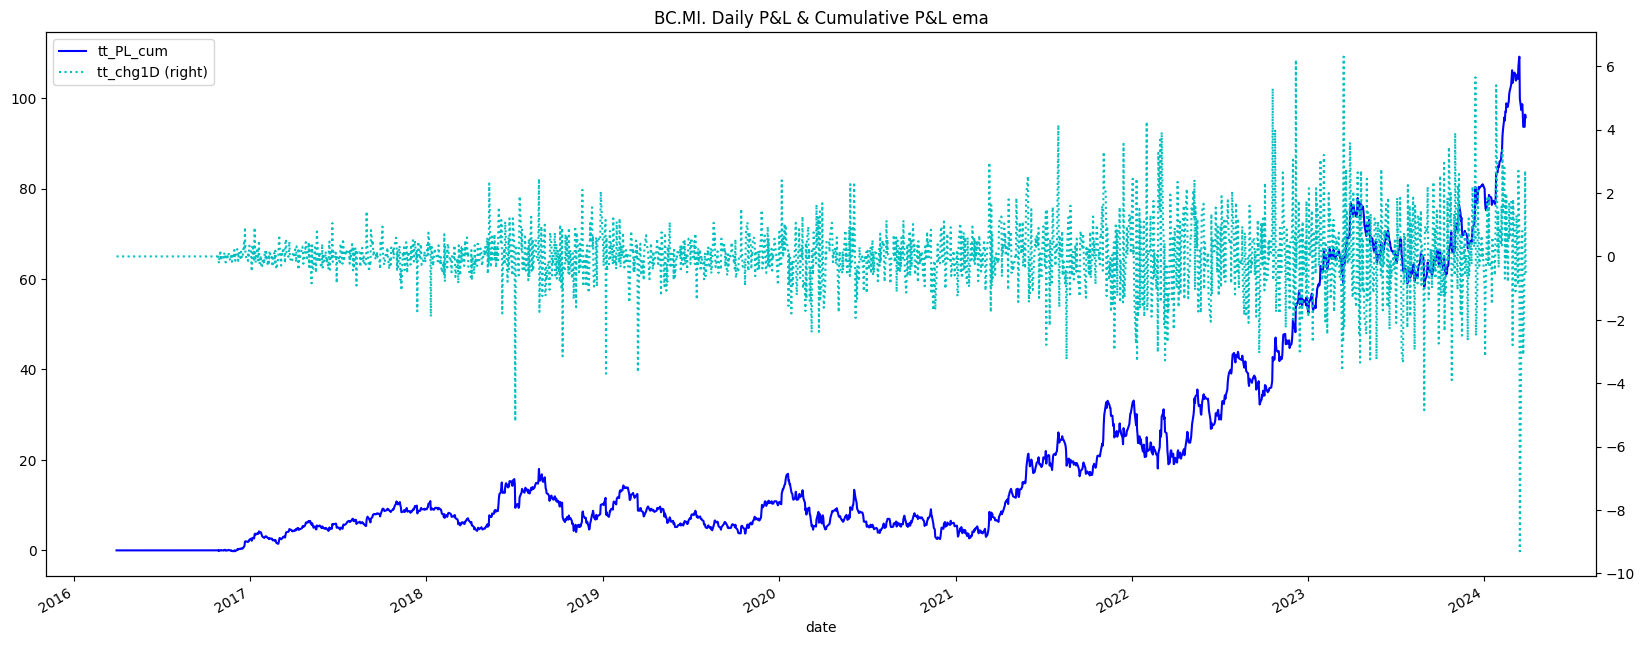

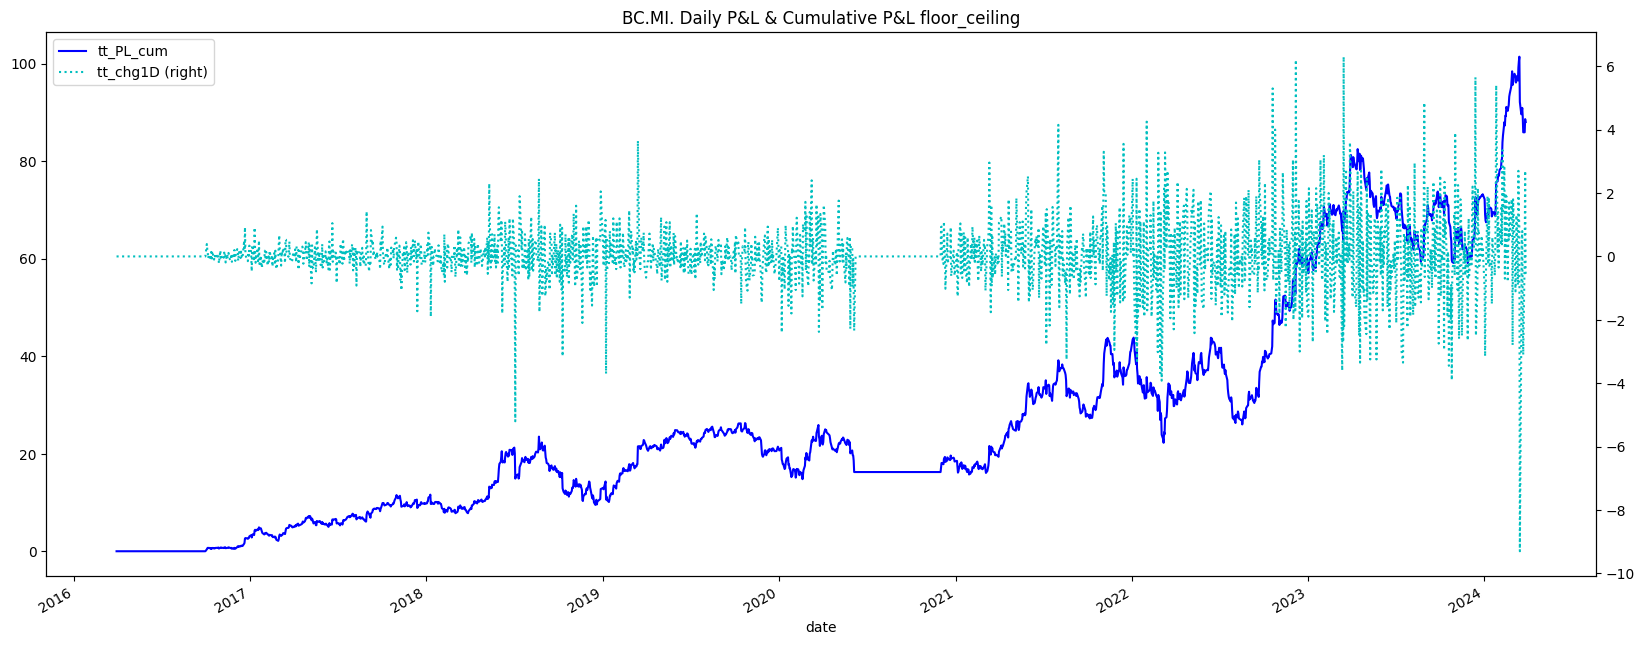

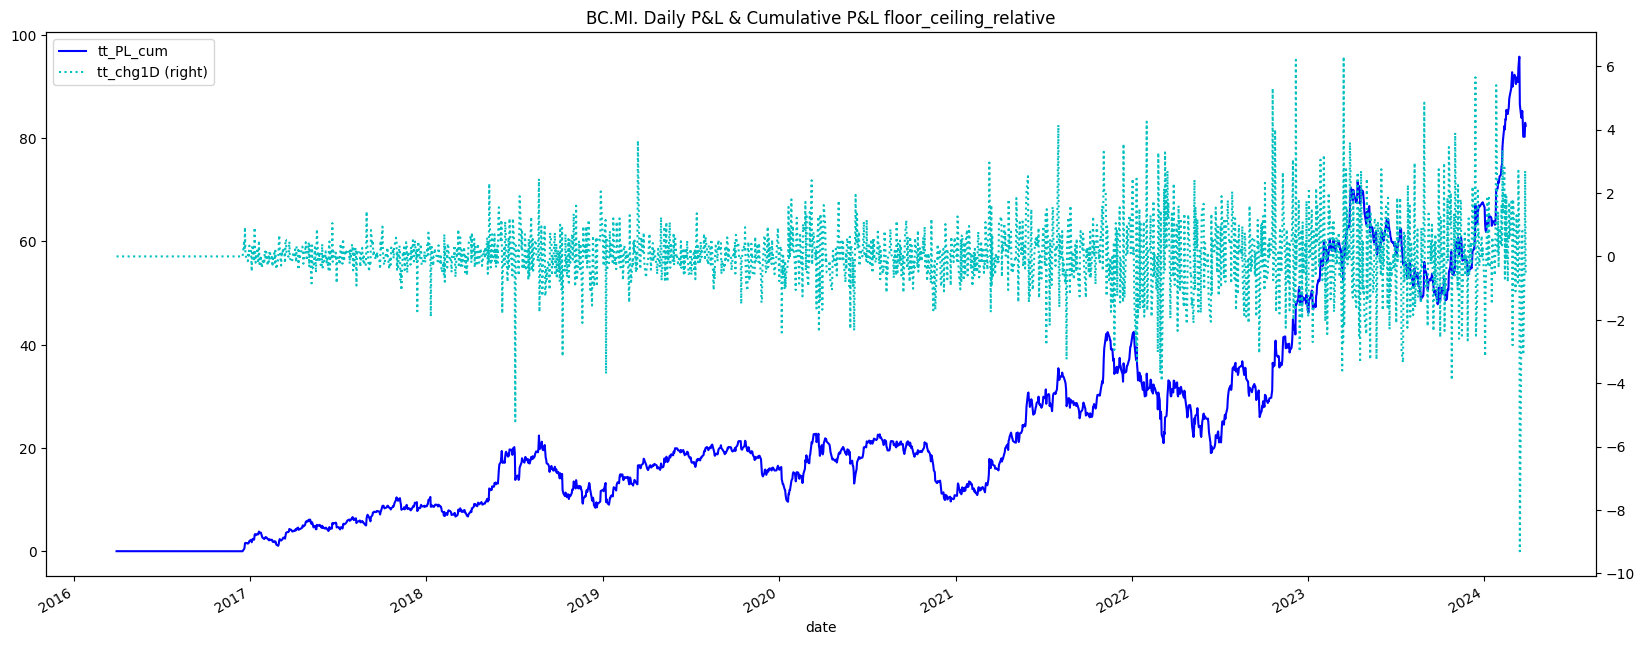

In [41]:
for i in range(len(signal)):  
    # print(i)
    df = output_signals[i]  # get the ith dataframe from df_signal  
    s = signal[i]  # get the ith signal from signal  
    m = method[i]
    plot_PL(df, ticker, m)

In [42]:
output_df_sel = pd.concat(output_signals, axis=0)  
output_df_sel = output_df_sel[['method', 'trading_edge','geometric_expectancy','kelly']]
output_df_sel.groupby('method').last() 

trading_edge  geometric_expectancy      kelly
method                                                               
breakout                    0.000939              0.000916  20.129213
ema                         0.002377              0.002354  52.619145
floor_ceiling               0.002179              0.002156  48.067289
floor_ceiling_relative      0.002179              0.002156  48.067289
sma                         0.000829              0.000806  17.707695
turtle                      0.002176              0.002161  66.797833

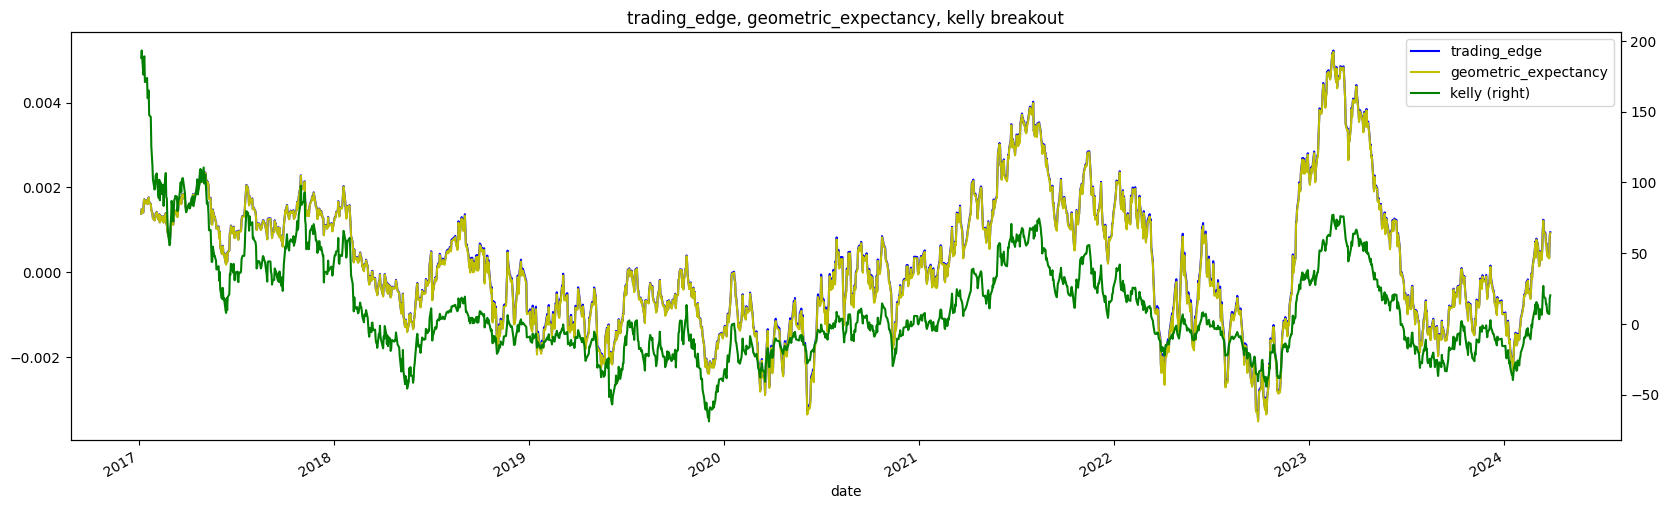

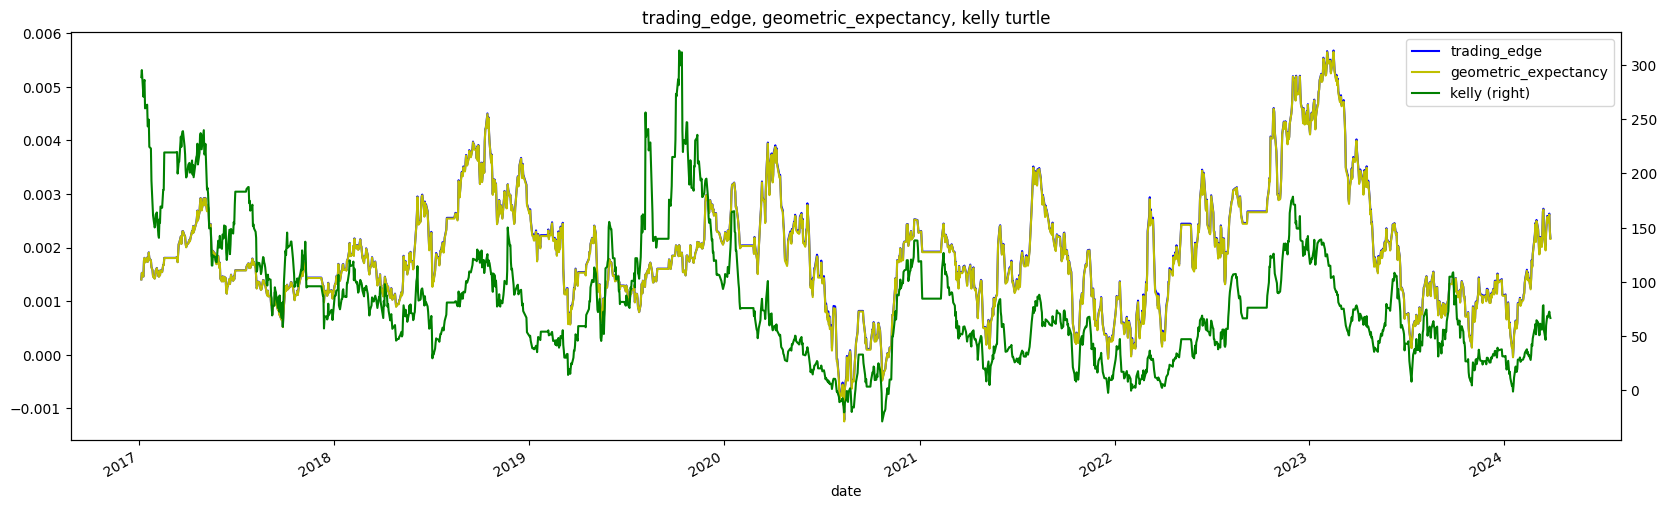

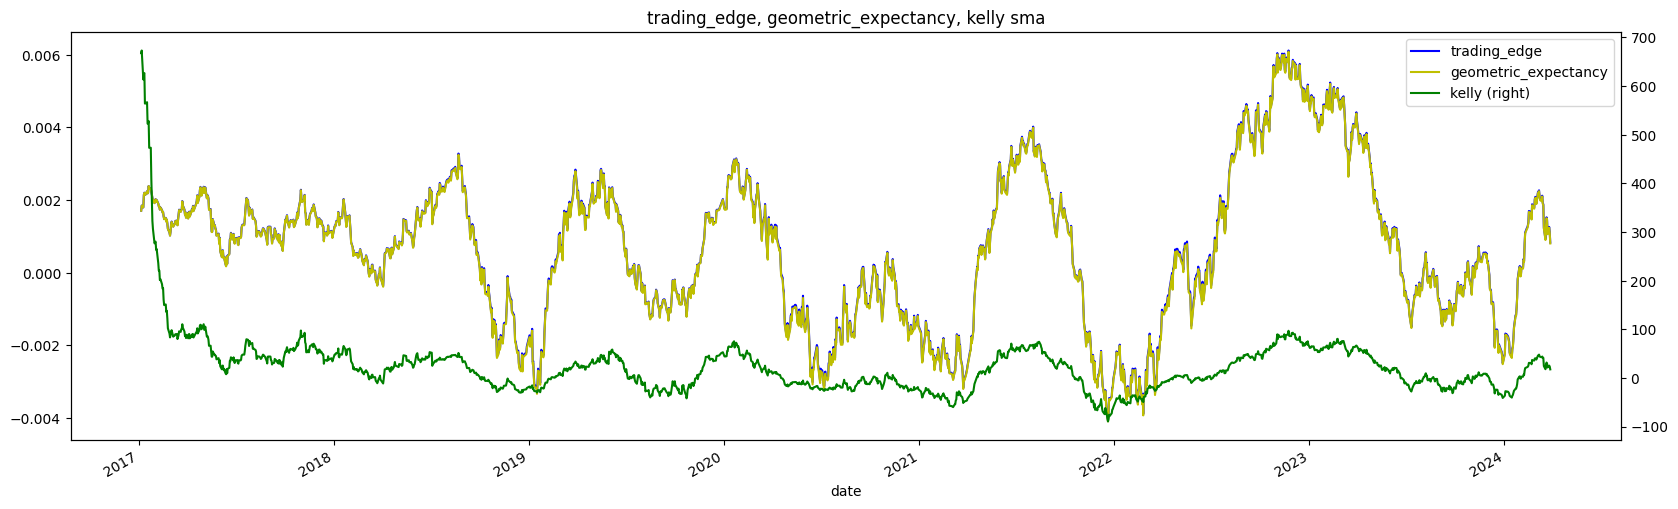

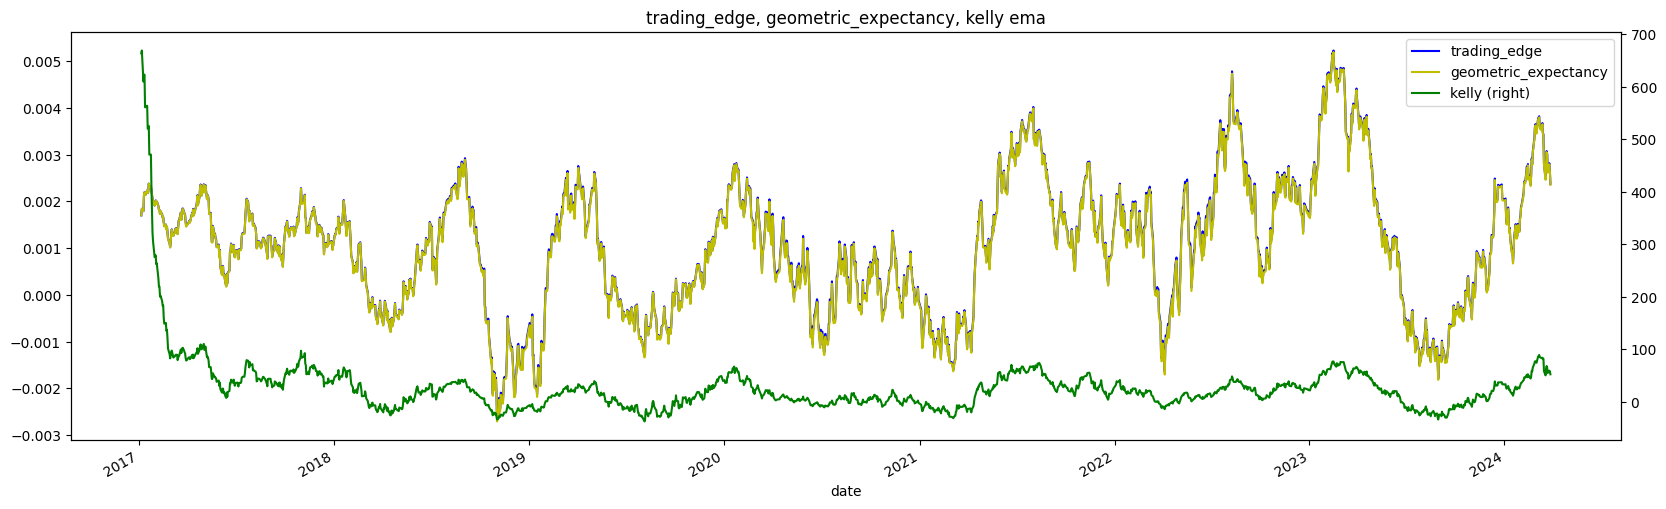

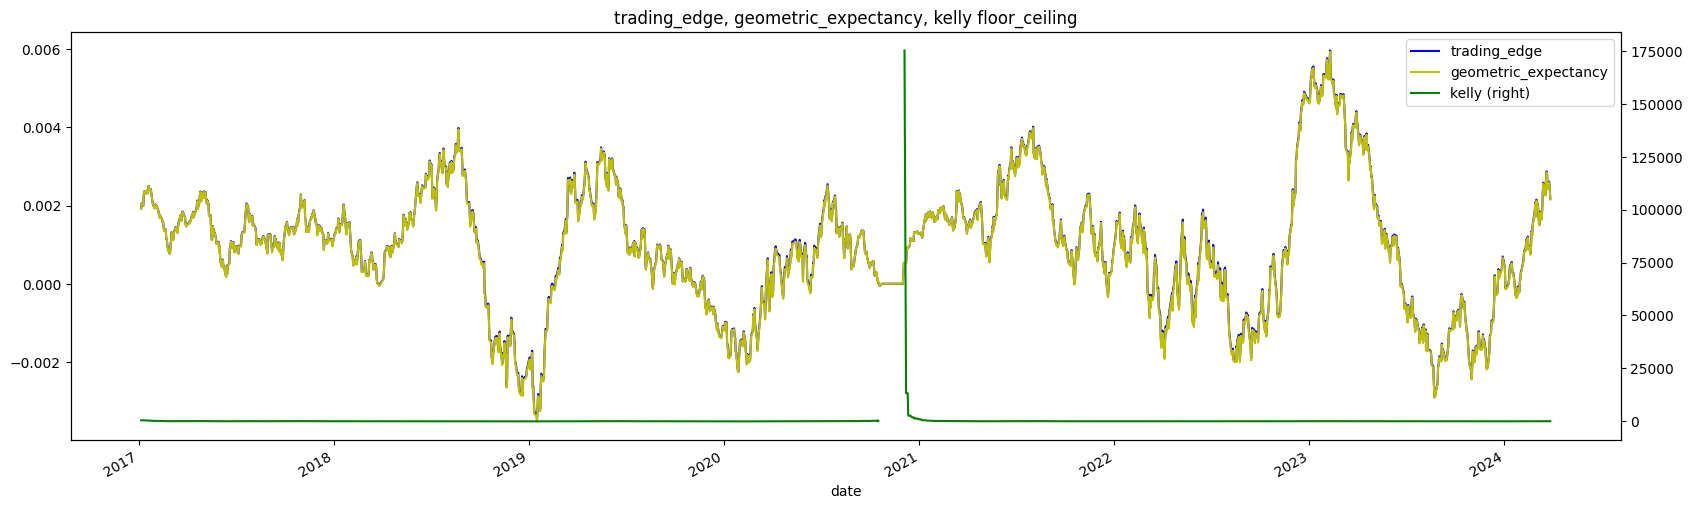

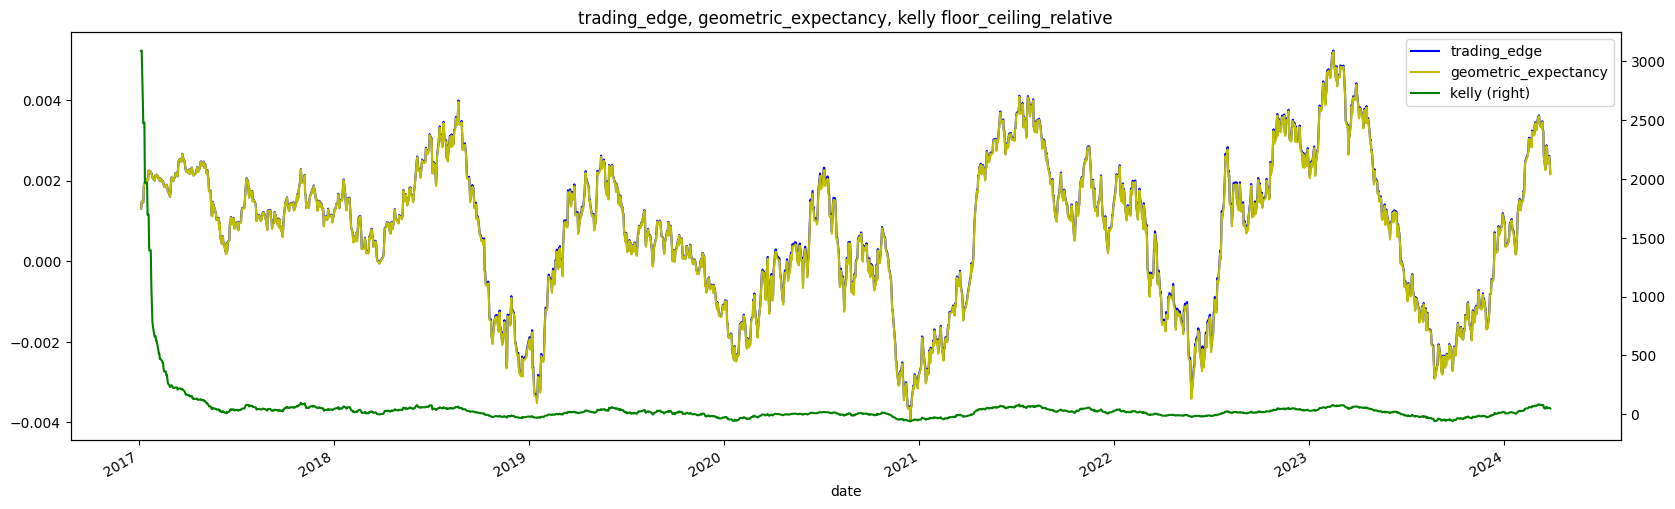

In [43]:
for i in range(len(signal)):  
    # print(i)
    df = output_signals[i]  # get the ith dataframe from df_signal  
    s = signal[i]  # get the ith signal from signal  
    m = method[i]
    plot_expectancies(df, window_exp, m)

In [44]:
starting_capital = 100000
lot = 100
mn = -0.0025
mx = -0.0075
# avg = (mn + mx) / 2
tolerance= -0.1
equal_weight = 0.05
span= 5
fx = 1

In [45]:

for i in range(len(signal)):  
    df = output_signals[i]  # get the ith dataframe from df_signal  
    s = signal[i]  # get the ith signal from signal  
    m = method[i]
    output_df = get_equity_risk(df, tolerance, mn, mx, span)  # call the function on the ith dataframe and signal  
    output_signals.append(output_df)  # append the output dataframe to the list  


In [46]:

for i in range(len(signal)):  
    df = output_signals[i]  # get the ith dataframe from df_signal  
    s = signal[i]  # get the ith signal from signal  
    m = method[i]
    output_df = get_shares(df, starting_capital, lot, mn, mx, tolerance, equal_weight, span, fx, s)
    output_signals.append(output_df)  # append the output dataframe to the list  


In [47]:
output_df_sel = pd.concat(output_signals, axis=0)  
output_df_sel = output_df_sel[['method', 'constant','concave','convex','equal_weight', 'tt_PL_cum_fx']]
output_df_sel.groupby('method').last() 

constant      concave       convex  equal_weight  \
method                                                                        
breakout                100974.0012  101948.0024  101948.0024   100974.0012   
ema                     157449.9976  186174.9964  186174.9964   119149.9992   
floor_ceiling           267952.0000  349152.0000  349152.0000   110424.0000   
floor_ceiling_relative  149434.0000  174151.0000  174151.0000   116478.0000   
sma                     126225.9928  139338.9892  139338.9892   108741.9976   
turtle                  106169.9996  108522.9986  107194.9990   100591.9993   

                        tt_PL_cum_fx  
method                                
breakout                    4.870006  
ema                        95.749996  
floor_ceiling              88.000000  
floor_ceiling_relative     82.390000  
sma                        43.709988  
turtle                     32.129993

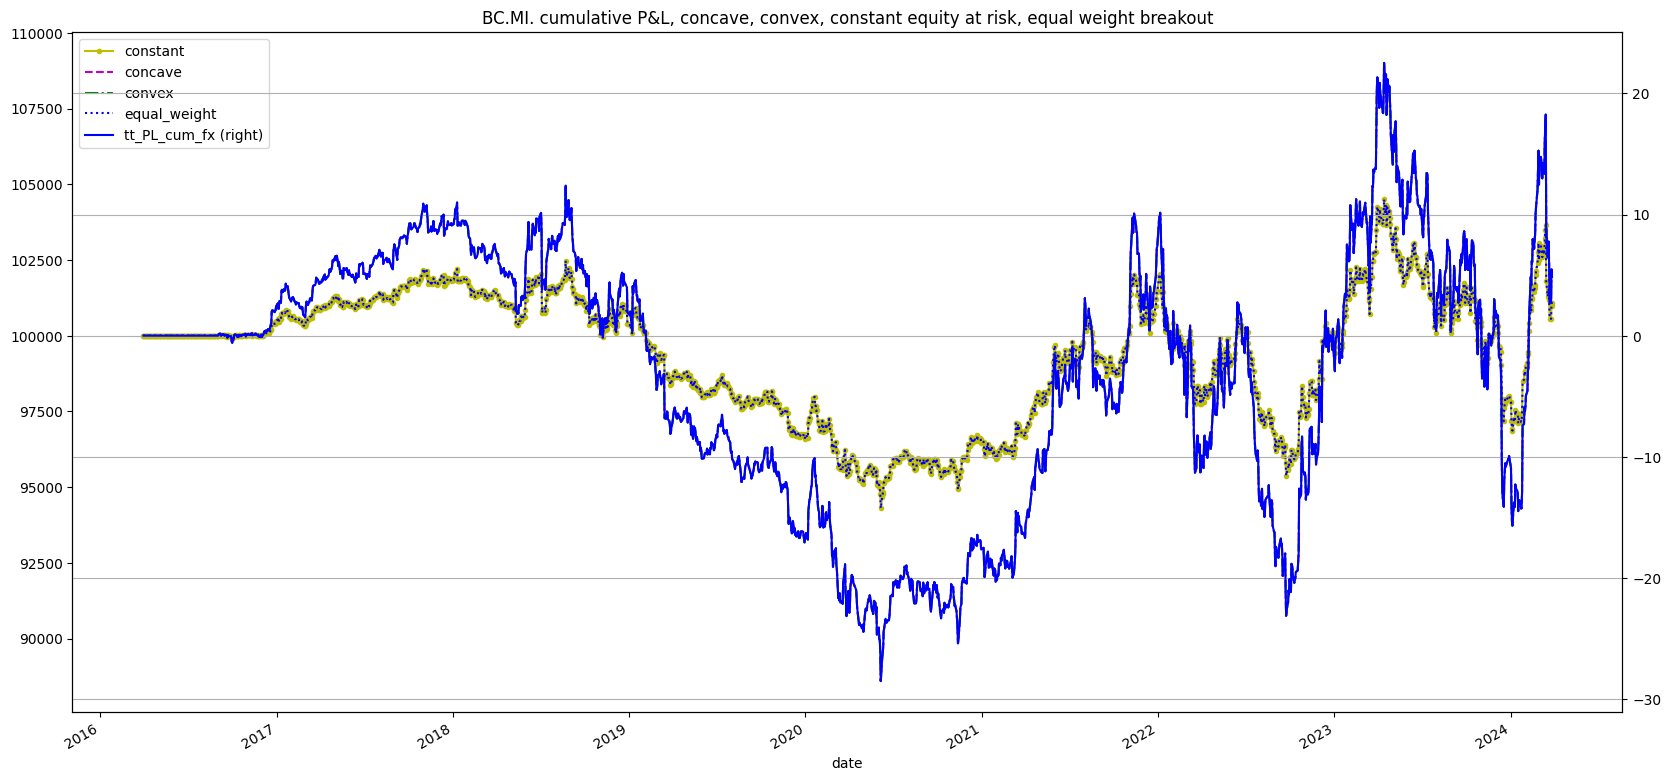

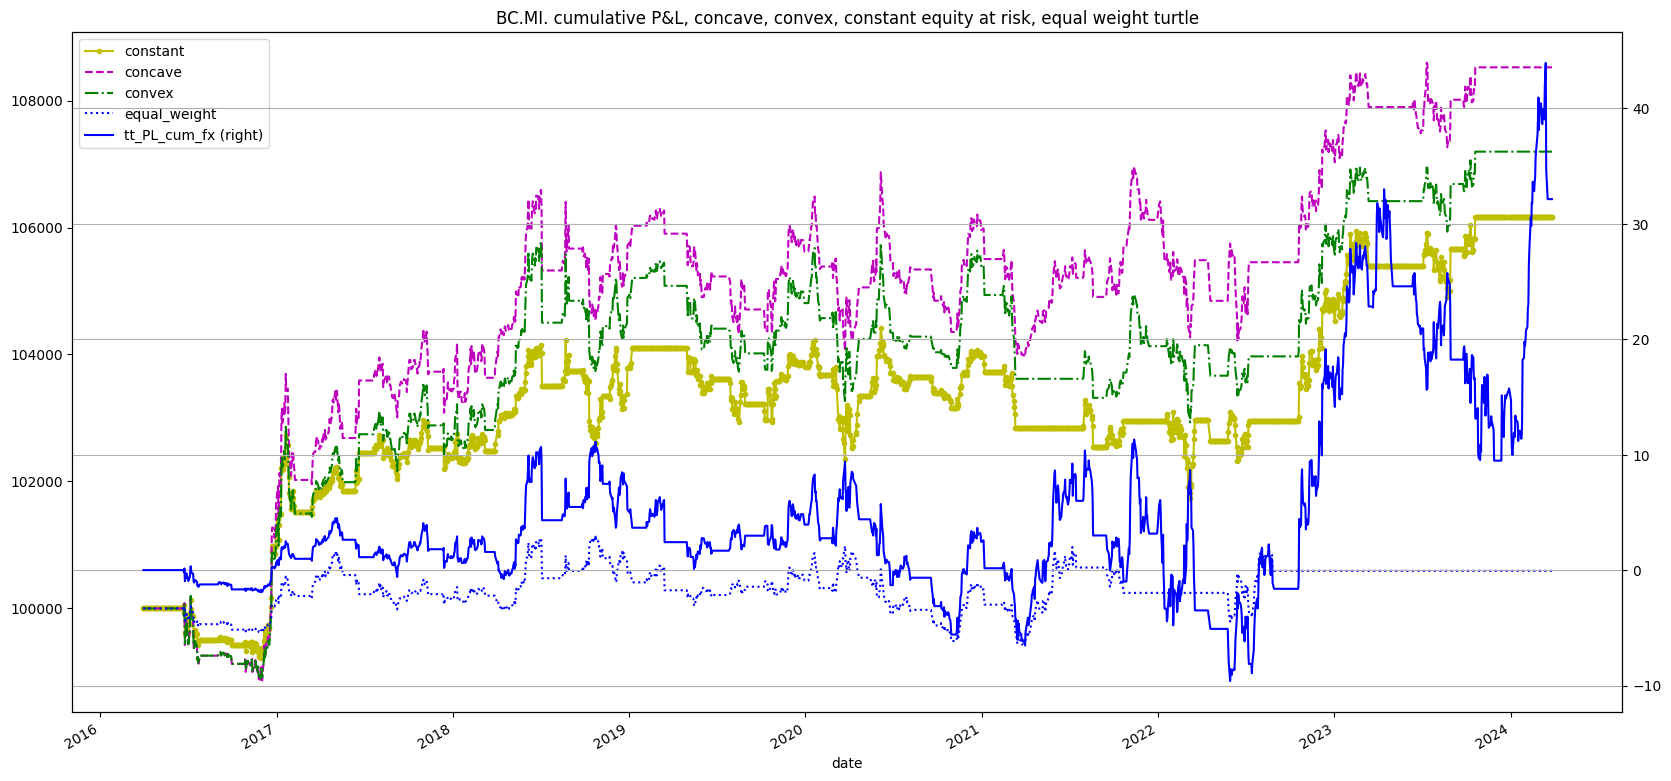

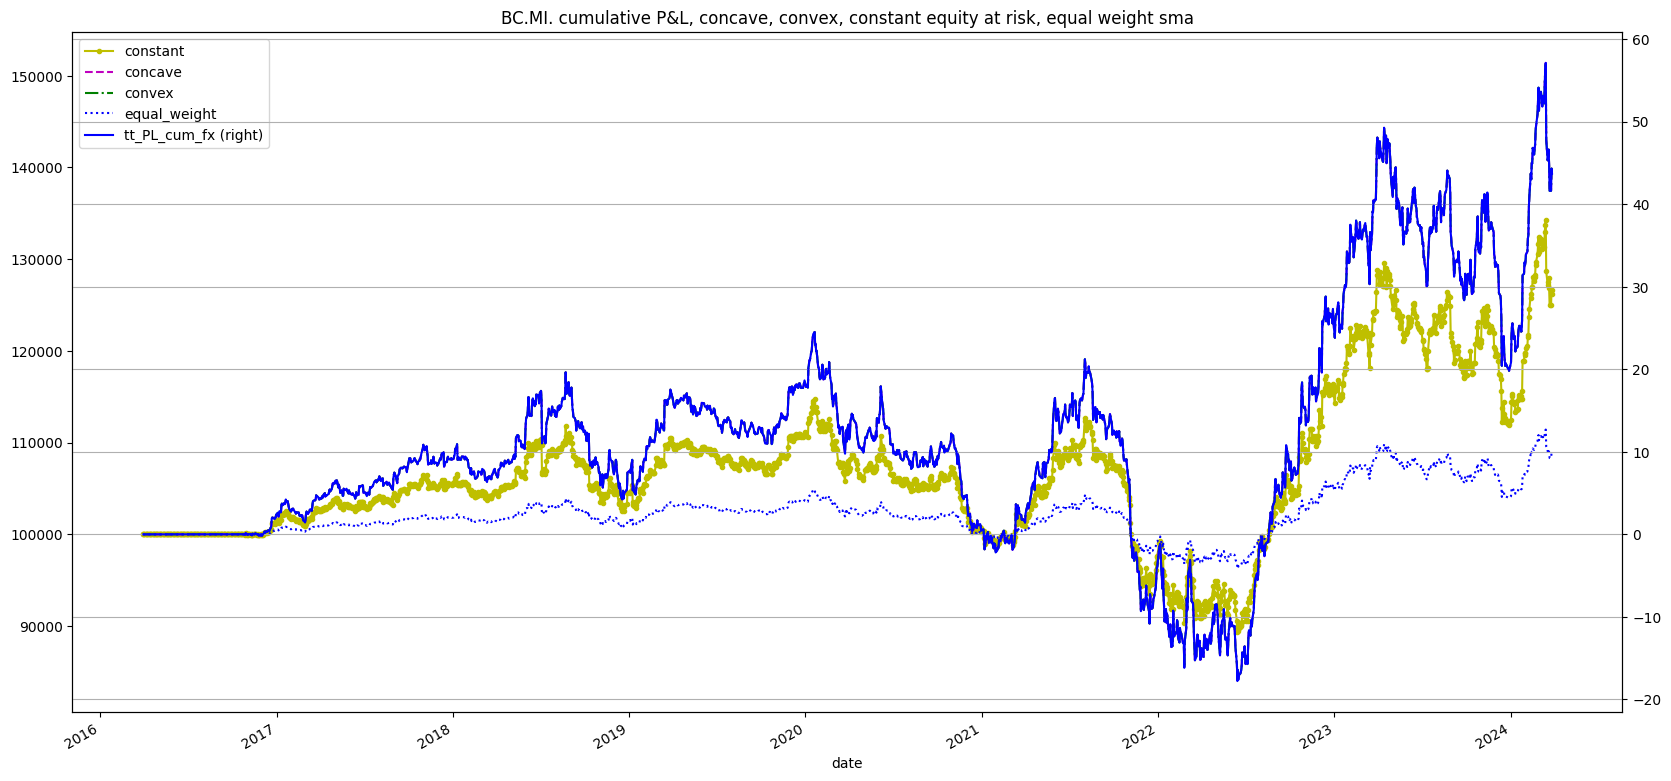

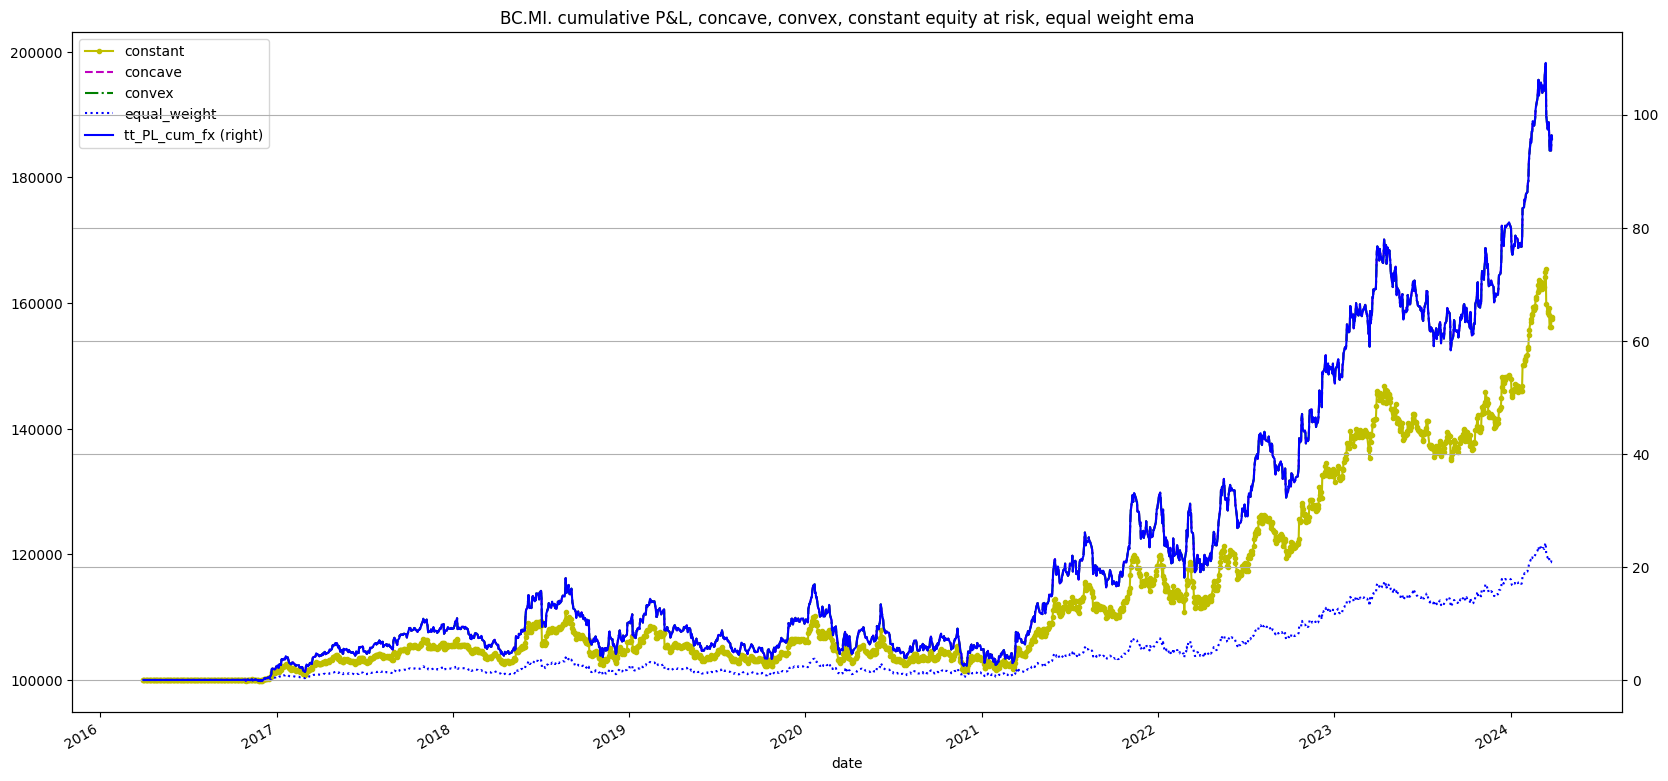

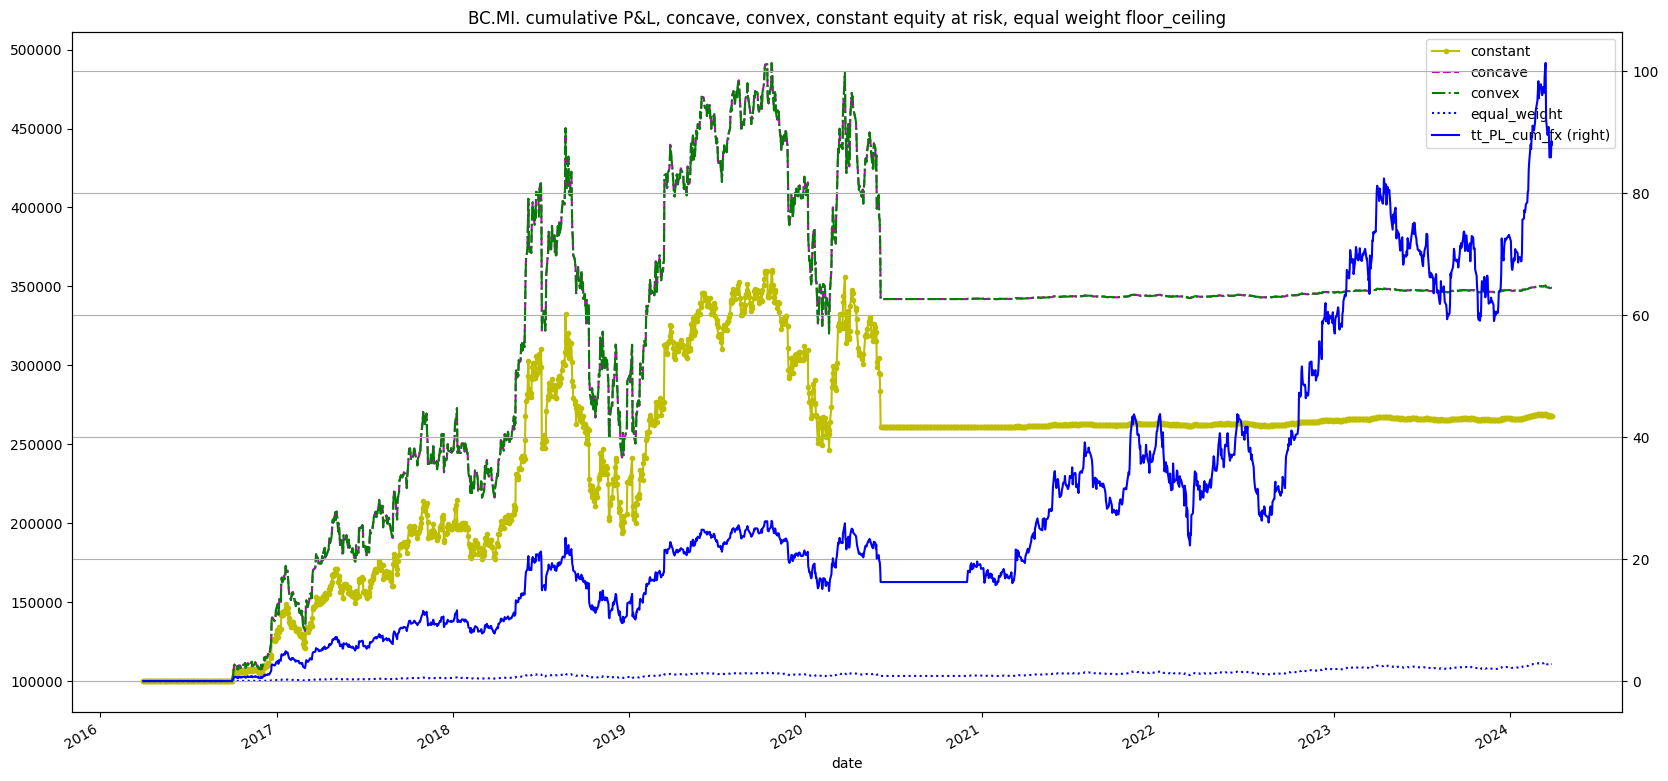

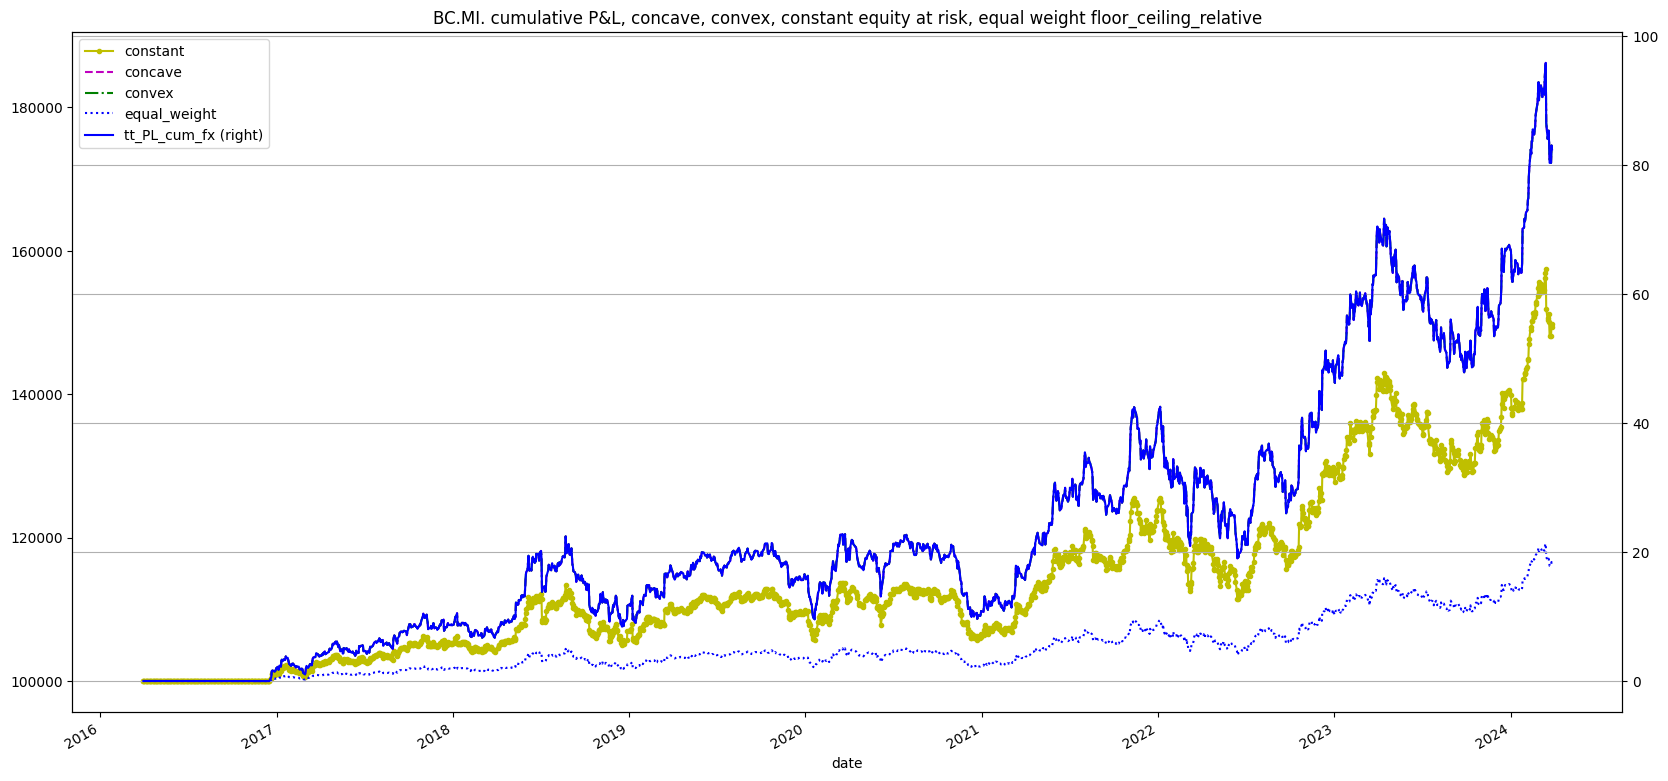

In [48]:
for i in range(len(signal)):  
    df = output_signals[i]  # get the ith dataframe from df_signal  
    s = signal[i]  # get the ith signal from signal  
    m = method[i]
    # print(df.tail())
    plot_equity_amount(df, ticker, m)

In [49]:
# # determining the name of the file
# file_name = 'A2A_unt.xlsx'
 
# # saving the excel
# df.to_excel(file_name)

output_df_sel = pd.concat(output_signals, axis=0)  
output_df_sel = output_df_sel[['method', 'shs_eql','shs_fxd','shs_ccv','shs_cvx']]
output_df_sel.groupby('method').last() 

shs_eql  shs_fxd  shs_ccv  shs_cvx
method                                                    
breakout                   -0.0    200.0    400.0    400.0
ema                        -0.0    600.0    900.0    900.0
floor_ceiling              -0.0    100.0    100.0    100.0
floor_ceiling_relative     -0.0    600.0    900.0    900.0
sma                        -0.0    600.0    900.0    900.0
turtle                     -0.0     -0.0     -0.0     -0.0

In [50]:
# def plot_shares_signal(df, ticker, signal, m):
#     df[['shs_eql','shs_fxd','shs_ccv','shs_cvx', signal]].plot(secondary_y=[signal],figsize=(20,8),style= ['k','r--','b:','b', 'y'],
#                                                          title= str(ticker)+' shares ' + str(m))
#     plt.show()
    
# for i in range(len(signal)):  
#     # print(i)
#     df = output_signals[i]  # get the ith dataframe from df_signal  
#     s = signal[i]  # get the ith signal from signal  
#     m = method[i]
#     plot_shares_signal(output_signals[i].tail(300), ticker, signal[i], method[i])
